In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, power_transform
import scipy.stats as stats
sns.set_theme()

In [4]:
home_df = pd.read_csv("../../data/players_home_matches.csv")

In [5]:
important_cols = [
    'goals',
    'assists',
    'shots_total',
    'shots_on_target',
    'xg',
    'xa',
    'gca',
    'carries',
    'dispossessed',
    'dribbled_past',
    'own_goals',
    'pens_made',
    'pens_won',
    'pens_att',
    'players_dribbled_past',
    'through_balls',
    'corner_kicks',
    'throw_ins',
    'interceptions',
    'tackles',
    'pressures',
    'ball_recoveries',
    'blocks',
    'blocked_shots',
    'clearances',
    'passes',
    'passes_progressive_distance',
    'passes_into_final_third',
    'passes_offsides',
    'passes_switches',
    'dribbles',
    'fouled',
    'fouls',
    'offsides',
    'minutes'
]

In [6]:
df = home_df[important_cols]
df.head()

goals  assists  shots_total  shots_on_target   xg   xa  gca  carries  \
0      1        0            3                0  0.9  0.1  0.0     28.0   
1      0        0            0                0  0.0  0.1  0.0     22.0   
2      0        1            1                0  0.1  0.4  1.0     25.0   
3      0        0            1                0  0.1  0.0  0.0      9.0   
4      0        1            1                0  0.0  0.3  1.0     35.0   

   dispossessed  dribbled_past  ...  passes  passes_progressive_distance  \
0           1.0            3.0  ...    38.0                        119.0   
1           1.0            2.0  ...    40.0                        226.0   
2           1.0            3.0  ...    23.0                         58.0   
3           0.0            0.0  ...    10.0                         74.0   
4           2.0            7.0  ...    31.0                        162.0   

   passes_into_final_third  passes_offsides  passes_switches  dribbles  \
0                      4.0              1.0              3.0       0.0   
1                      1.0              0.0              0.0       1.0   
2                      1.0              1.0              1.0       2.0   
3                      2.0              1.0              1.0       1.0   
4                      1.0              2.0              0.0       3.0   

   fouled  fouls  offsides  minutes  
0       3      2         1     90.0  
1       1      2         0     90.0  
2       0      2         0     83.0  
3       0      0         0     17.0  
4       1      2         0     90.0  

[5 rows x 35 columns]

## Cleaning data

In [7]:
df.describe()

goals       assists   shots_total  shots_on_target  \
count  76215.000000  76215.000000  76215.000000     76215.000000   
mean       0.103077      0.071967      0.910634         0.304008   
std        0.341038      0.278851      1.278673         0.635978   
min        0.000000      0.000000      0.000000         0.000000   
25%        0.000000      0.000000      0.000000         0.000000   
50%        0.000000      0.000000      0.000000         0.000000   
75%        0.000000      0.000000      1.000000         0.000000   
max        4.000000      4.000000     13.000000         8.000000   

                 xg            xa           gca       carries  dispossessed  \
count  76142.000000  76142.000000  76142.000000  76142.000000  76142.000000   
mean       0.099309      0.065399      0.168330     27.353405      0.780423   
std        0.219203      0.148858      0.458886     18.977424      1.146291   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000     13.000000      0.000000   
50%        0.000000      0.000000      0.000000     24.000000      0.000000   
75%        0.100000      0.100000      0.000000     38.000000      1.000000   
max        2.700000      2.200000      6.000000    171.000000     13.000000   

       dribbled_past  ...        passes  passes_progressive_distance  \
count   76142.000000  ...  76142.000000                 76142.000000   
mean        0.722256  ...     34.563119                   182.959746   
std         1.043229  ...     23.442851                   169.683467   
min         0.000000  ...      0.000000                     0.000000   
25%         0.000000  ...     16.000000                    44.000000   
50%         0.000000  ...     32.000000                   136.000000   
75%         1.000000  ...     49.000000                   280.000000   
max        12.000000  ...    203.000000                  1571.000000   

       passes_into_final_third  passes_offsides  passes_switches  \
count             76142.000000     76142.000000     76142.000000   
mean                  2.072509         0.114549         1.054517   
std                   2.579638         0.353726         1.489066   
min                   0.000000         0.000000         0.000000   
25%                   0.000000         0.000000         0.000000   
50%                   1.000000         0.000000         1.000000   
75%                   3.000000         0.000000         2.000000   
max                  37.000000         5.000000        15.000000   

           dribbles        fouled         fouls      offsides       minutes  
count  76142.000000  76215.000000  76215.000000  76215.000000  76168.000000  
mean       1.184602      0.924503      0.958237      0.131811     67.967637  
std        1.692163      1.191019      1.145124      0.426505     30.029930  
min        0.000000      0.000000      0.000000      0.000000      1.000000  
25%        0.000000      0.000000      0.000000      0.000000     45.000000  
50%        1.000000      1.000000      1.000000      0.000000     90.000000  
75%        2.000000      1.000000      2.000000      0.000000     90.000000  
max       19.000000     11.000000      9.000000      6.000000     90.000000  

[8 rows x 35 columns]

In [8]:
null_threshold = 0.5
rows_with_nulls  = home_df[home_df.isnull().sum(axis=1) >= null_threshold*len(home_df.columns)]
df = df.drop(rows_with_nulls.index)

In [9]:
df["minutes"] = df["minutes"].fillna(0)
df["pens_won"] = df["pens_won"].fillna(0)

## Transformations 
Base on histograms of selected variables we grouped them in three groups

In [10]:
exp_var = ['goals', 'assists', 'xa', 'gca', 'own_goals',  'pens_made', 'pens_won', 'pens_att', 'through_balls', 
                 'throw_ins', 'interceptions', 'tackles', 'blocks', 'blocked_shots', 'clearances', 'passes_offsides', 
                 'fouls', 'offsides', 'fouled', 'dribbles', 'passes_into_final_third',
                  'passes_switches', 'shots_total', 'shots_on_target', 'xg', 
                 'dispossessed', 'dribbled_past', 'players_dribbled_past', 'corner_kicks', 
                'passes_progressive_distance']

skewed_var = ['carries', 'ball_recoveries', 'passes', 'pressures']

other = ['minutes']


In [11]:
def Gaussian_distribution_check(data, variable):
    
    fig = plt.figure(figsize=(15,5), dpi=300)    
    
    ax1 = fig.add_subplot(1,2,1)
    sns.histplot(data[variable], kde=True, ax=ax1)
    
    ax2 = fig.add_subplot(1,2,2)  
    stats.probplot(data[variable], dist="norm", plot=ax2)

    plt.show()

### 1st group

In [12]:
# columns with exponential distribution that have more than 20 unique values
df_exp = df[exp_var]
count_val = df_exp.nunique()
tmp = count_val[count_val >20].index.tolist()
tmp

['xa',
 'throw_ins',
 'clearances',
 'passes_into_final_third',
 'xg',
 'passes_progressive_distance']

checking qq-plots before transformations

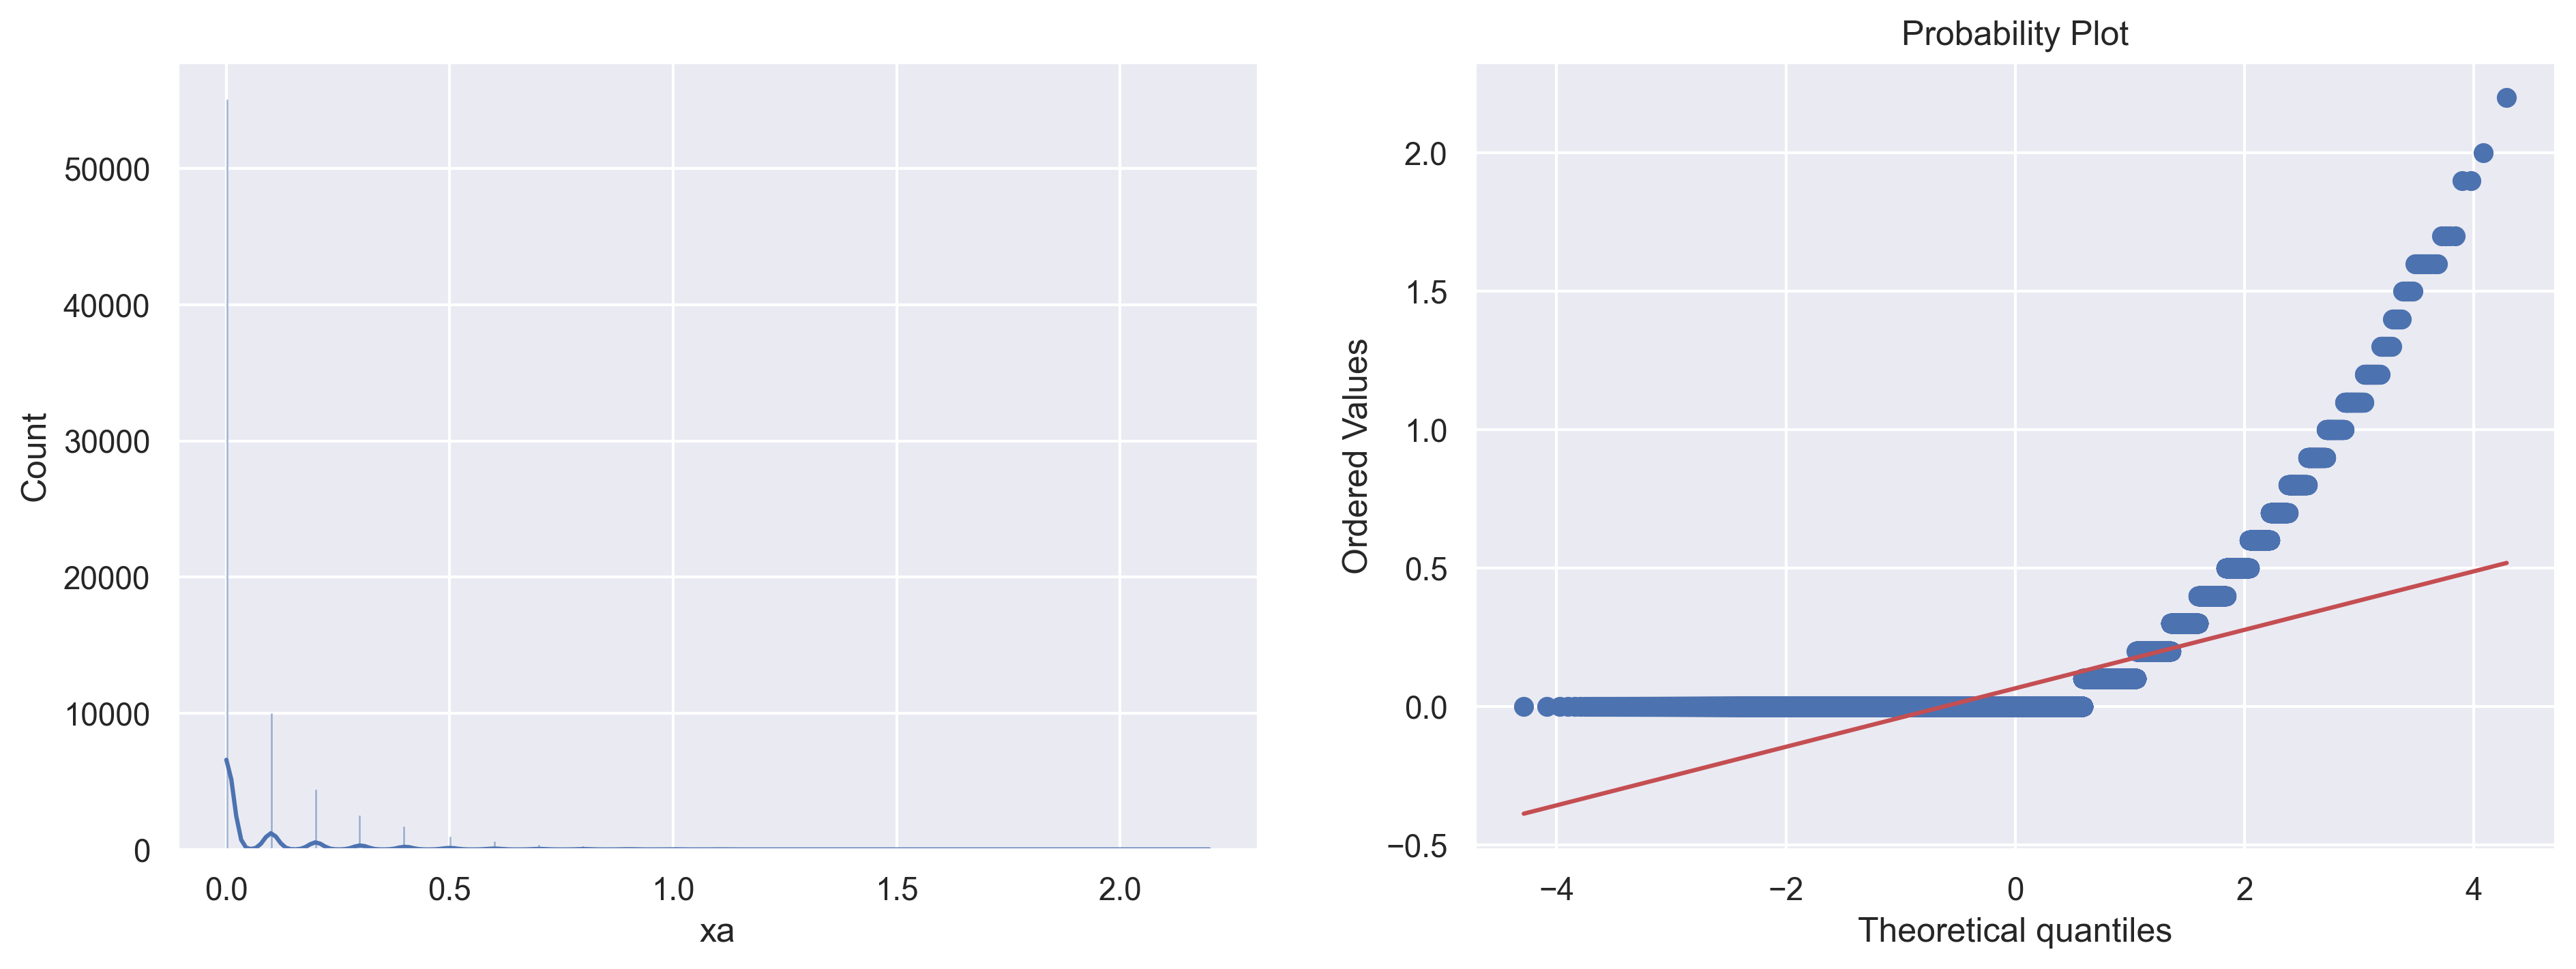

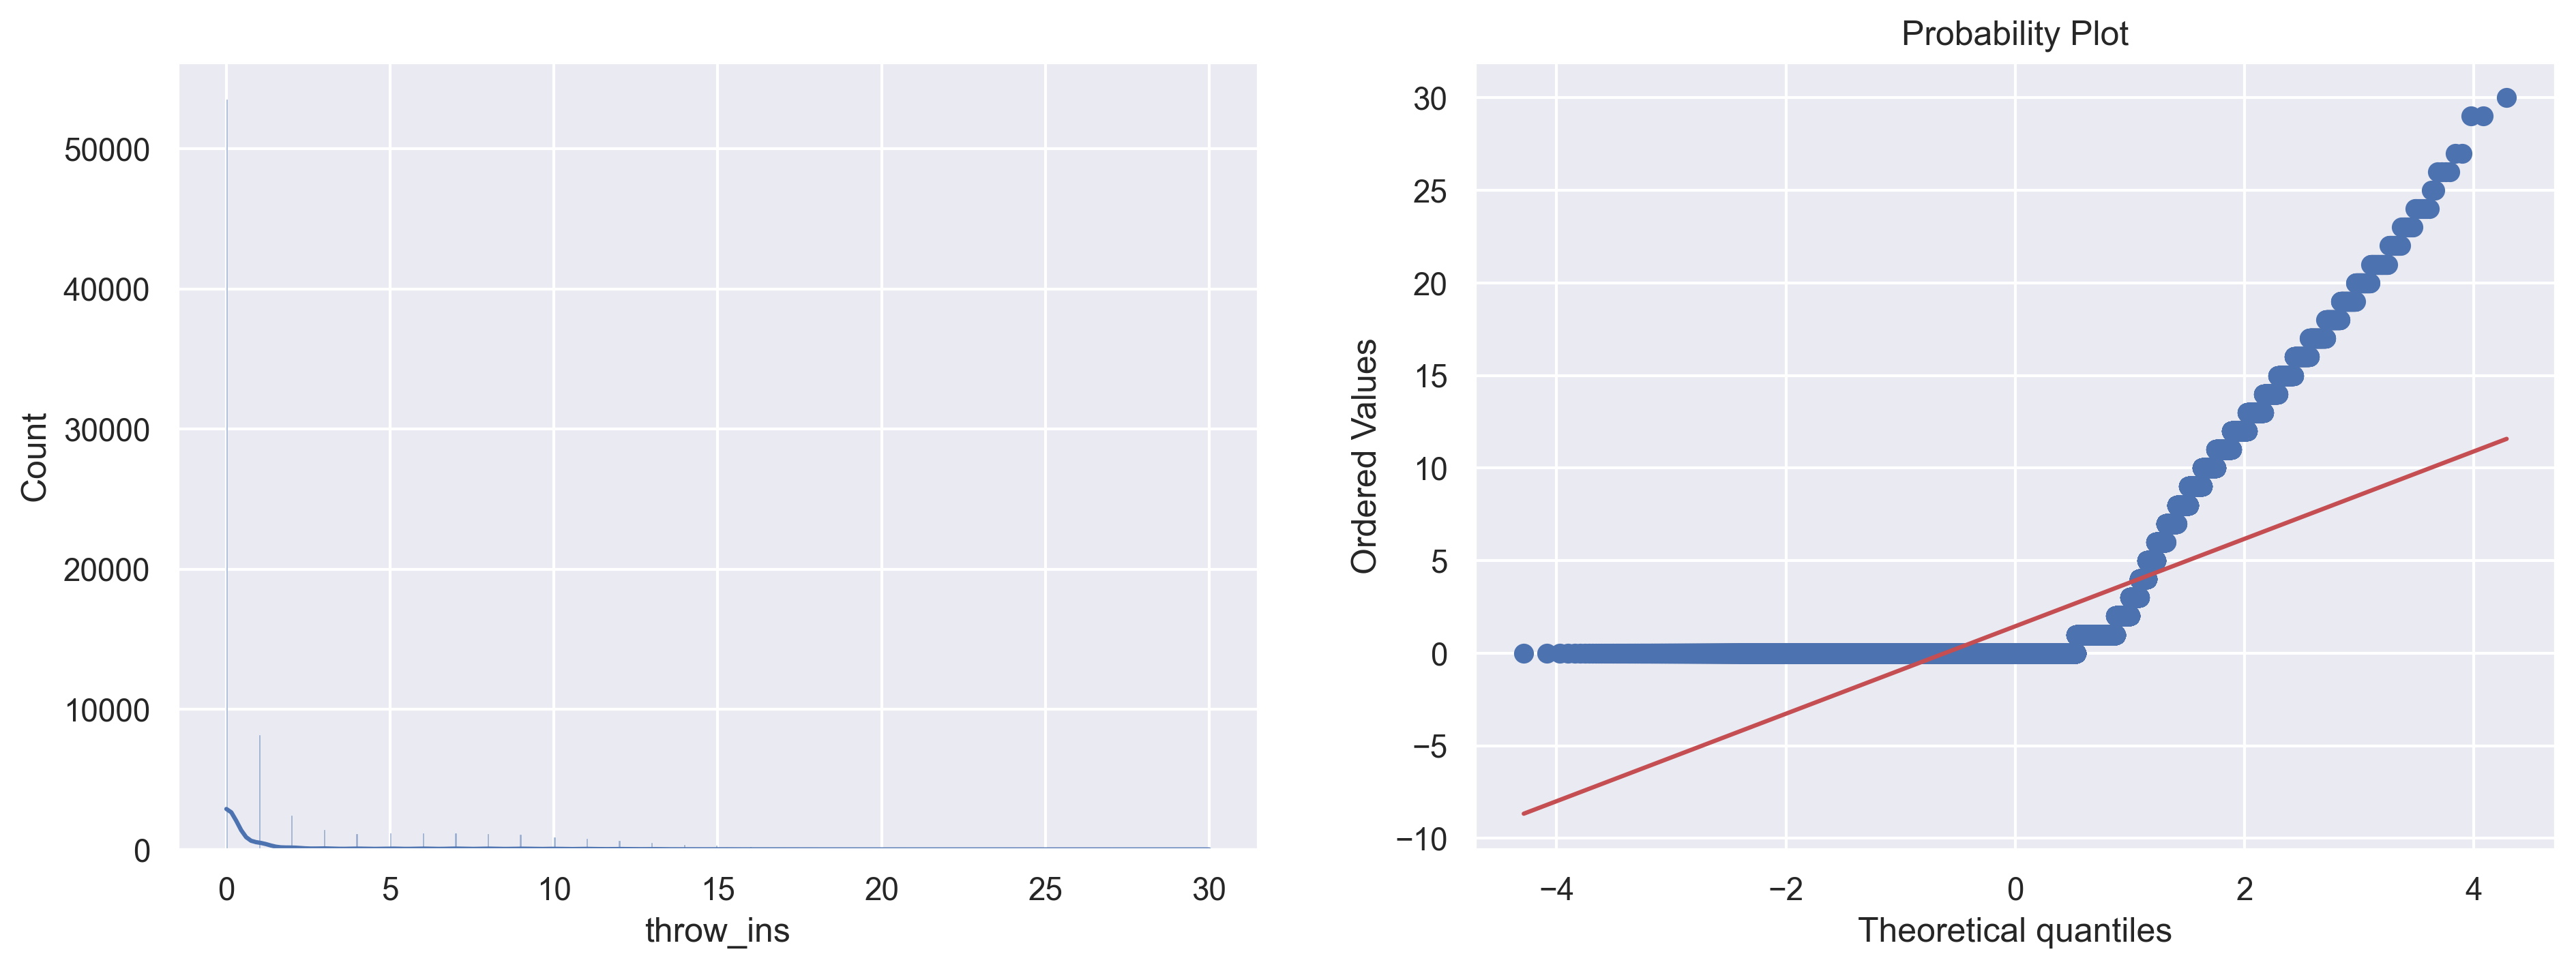

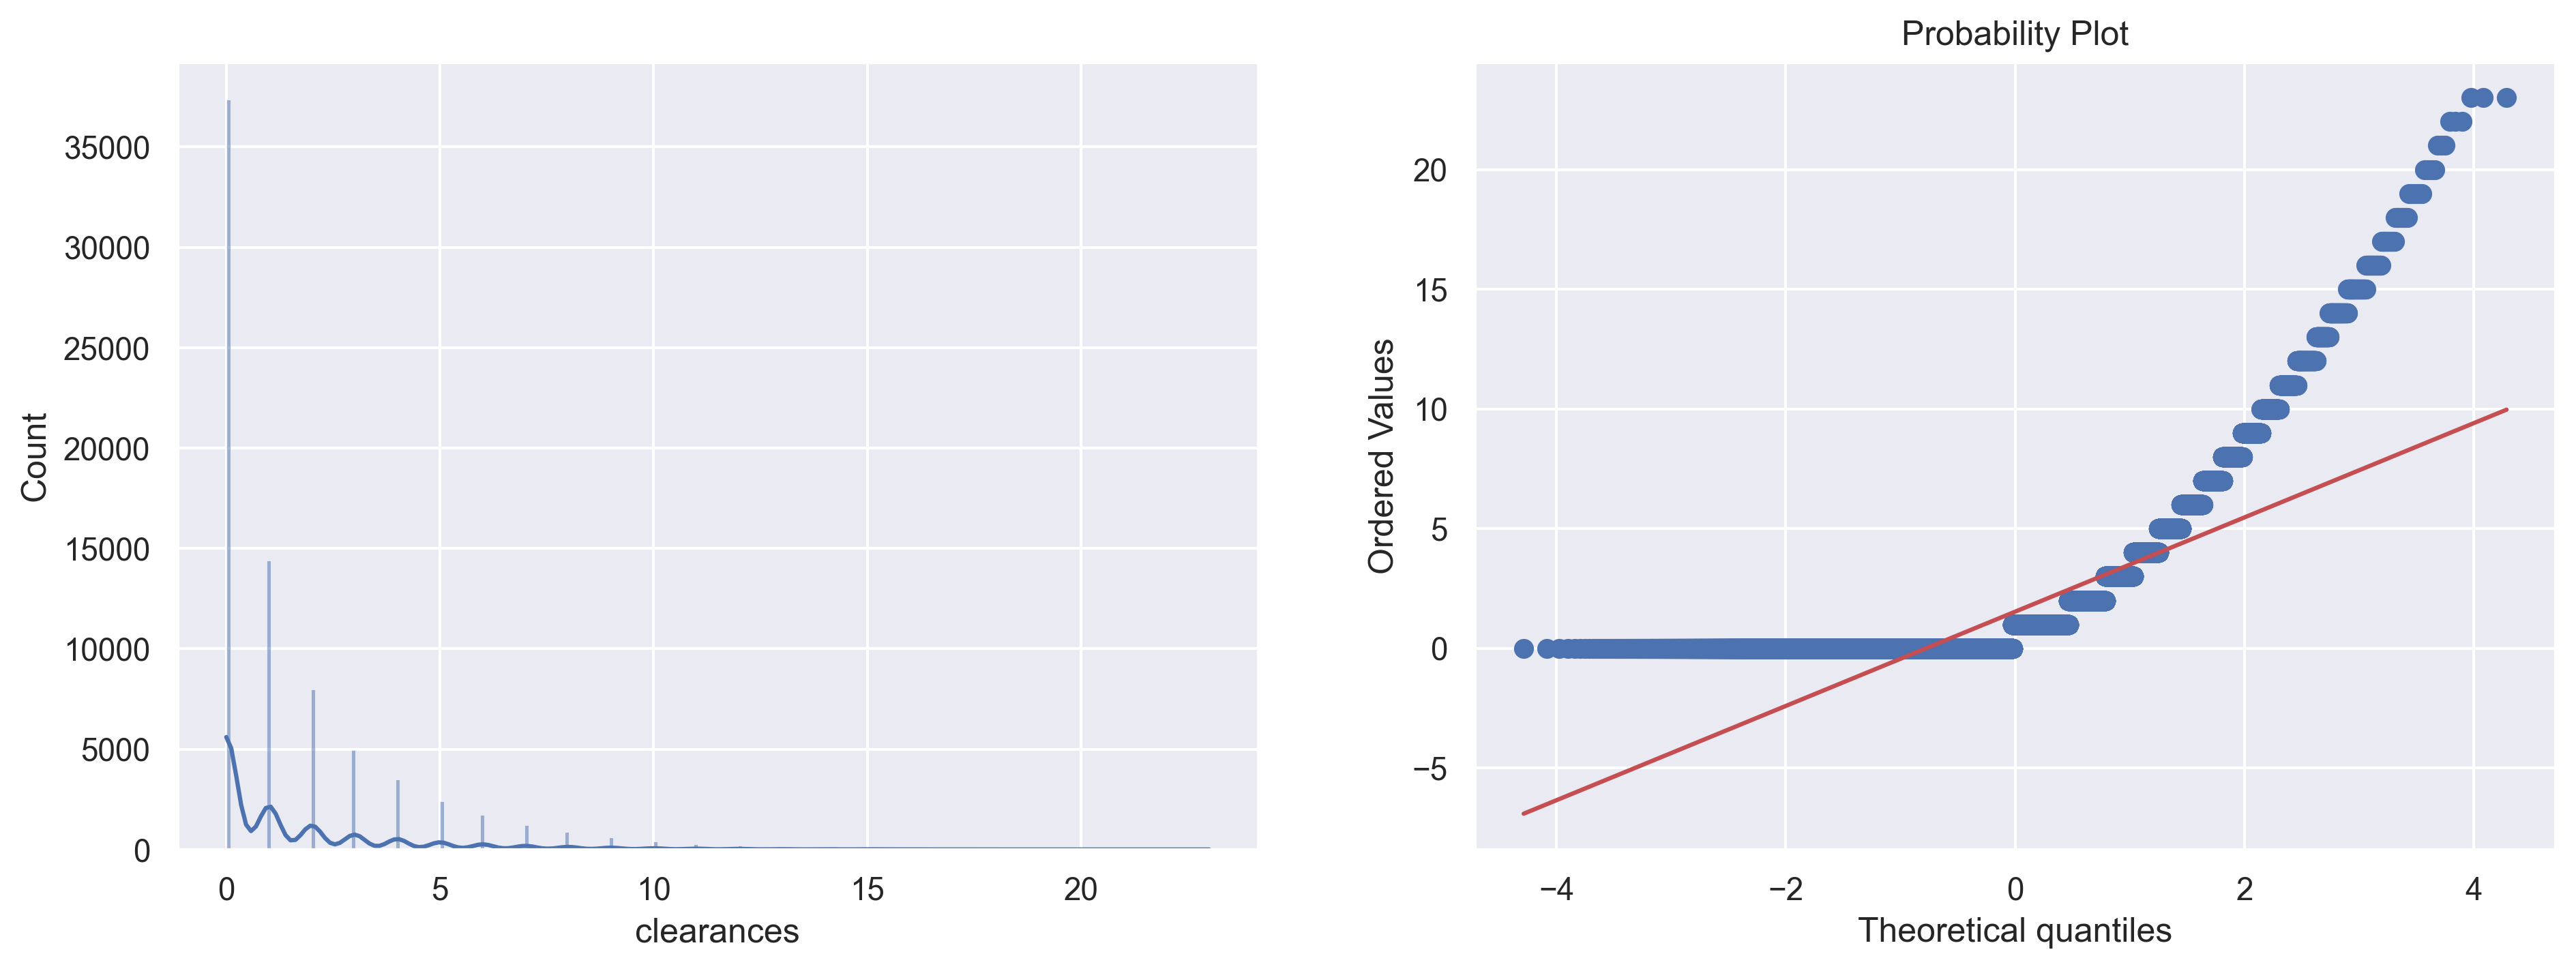

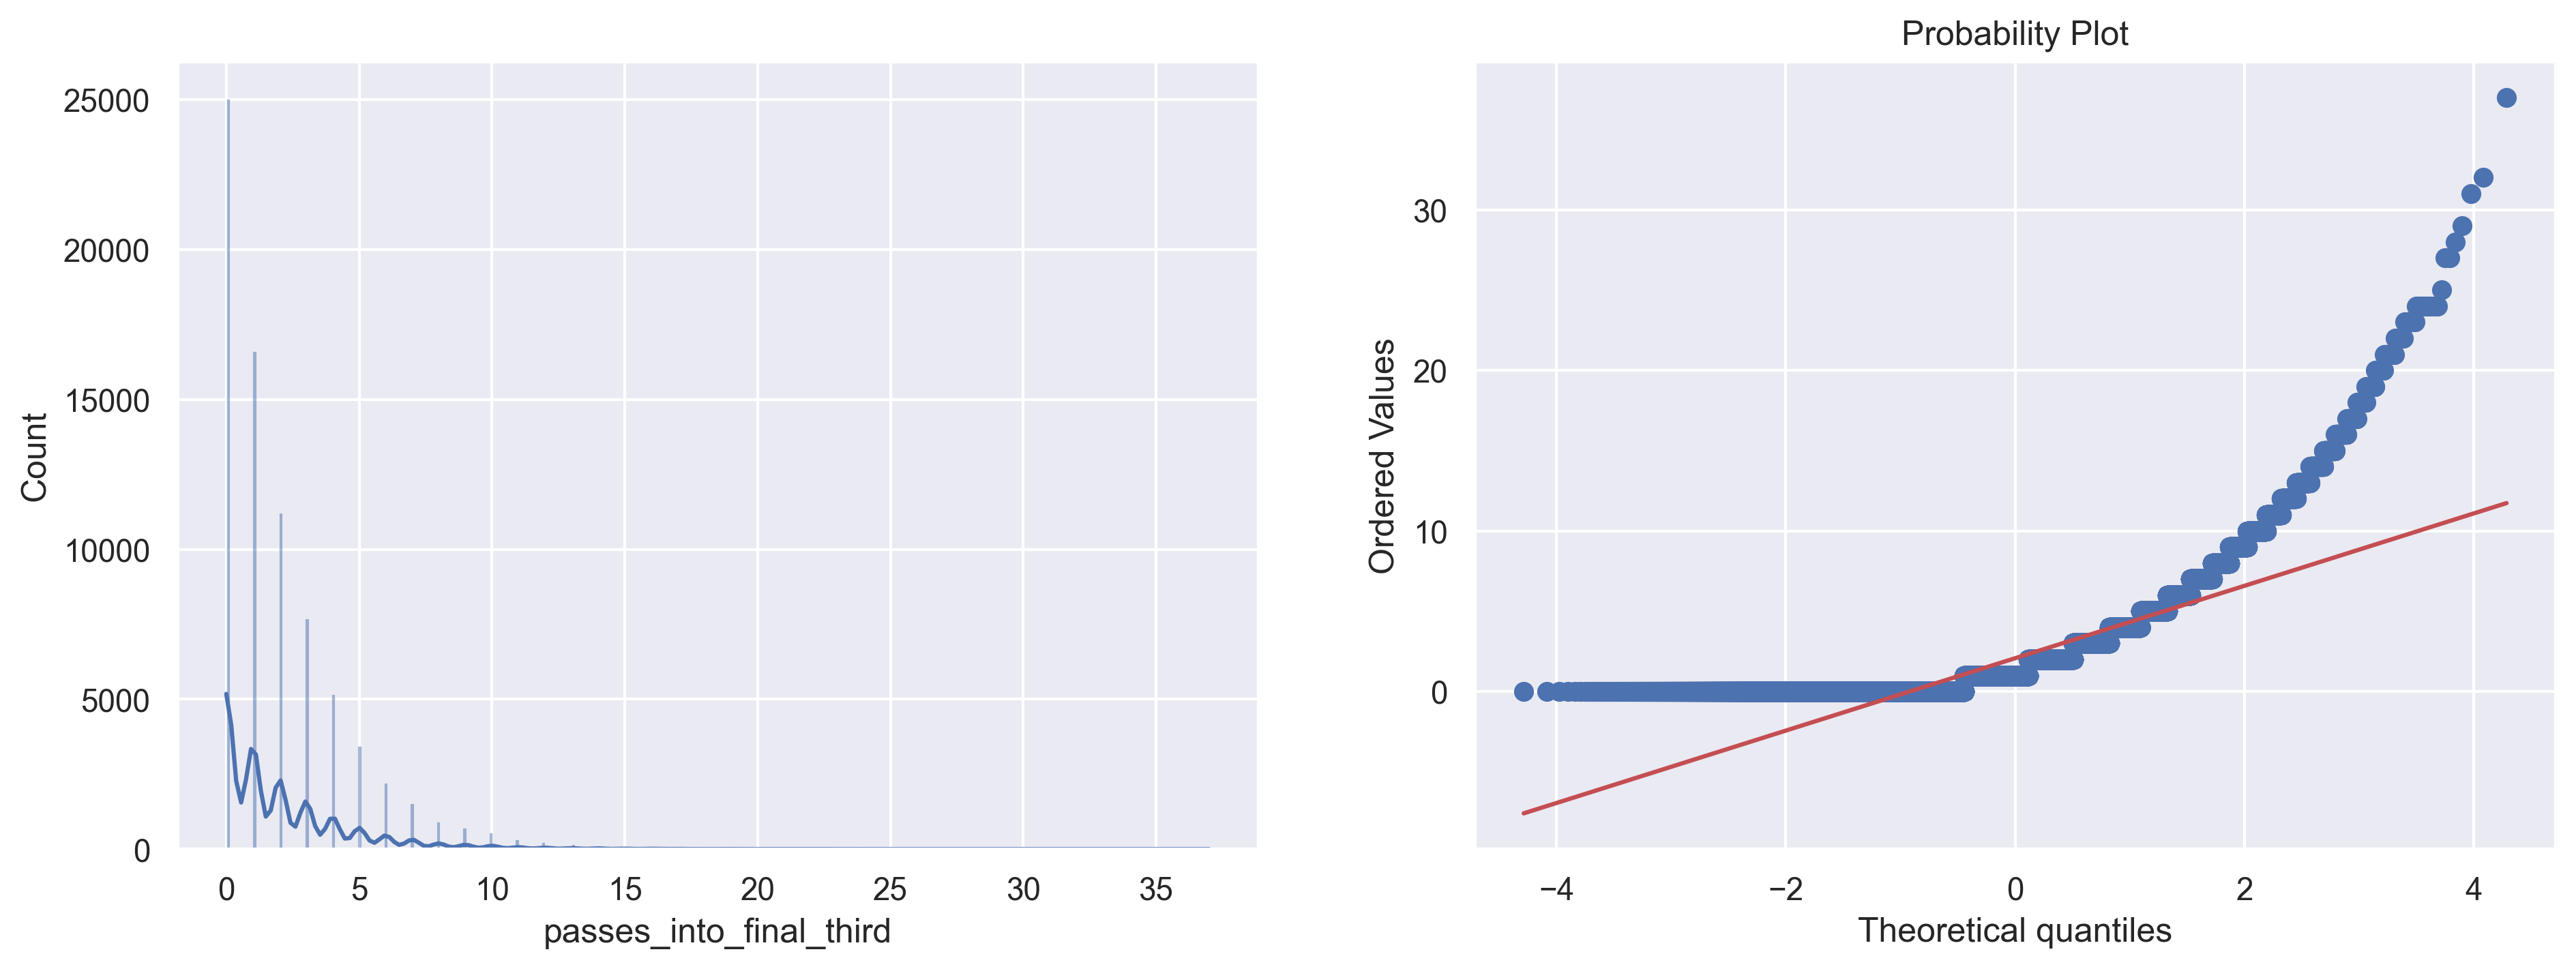

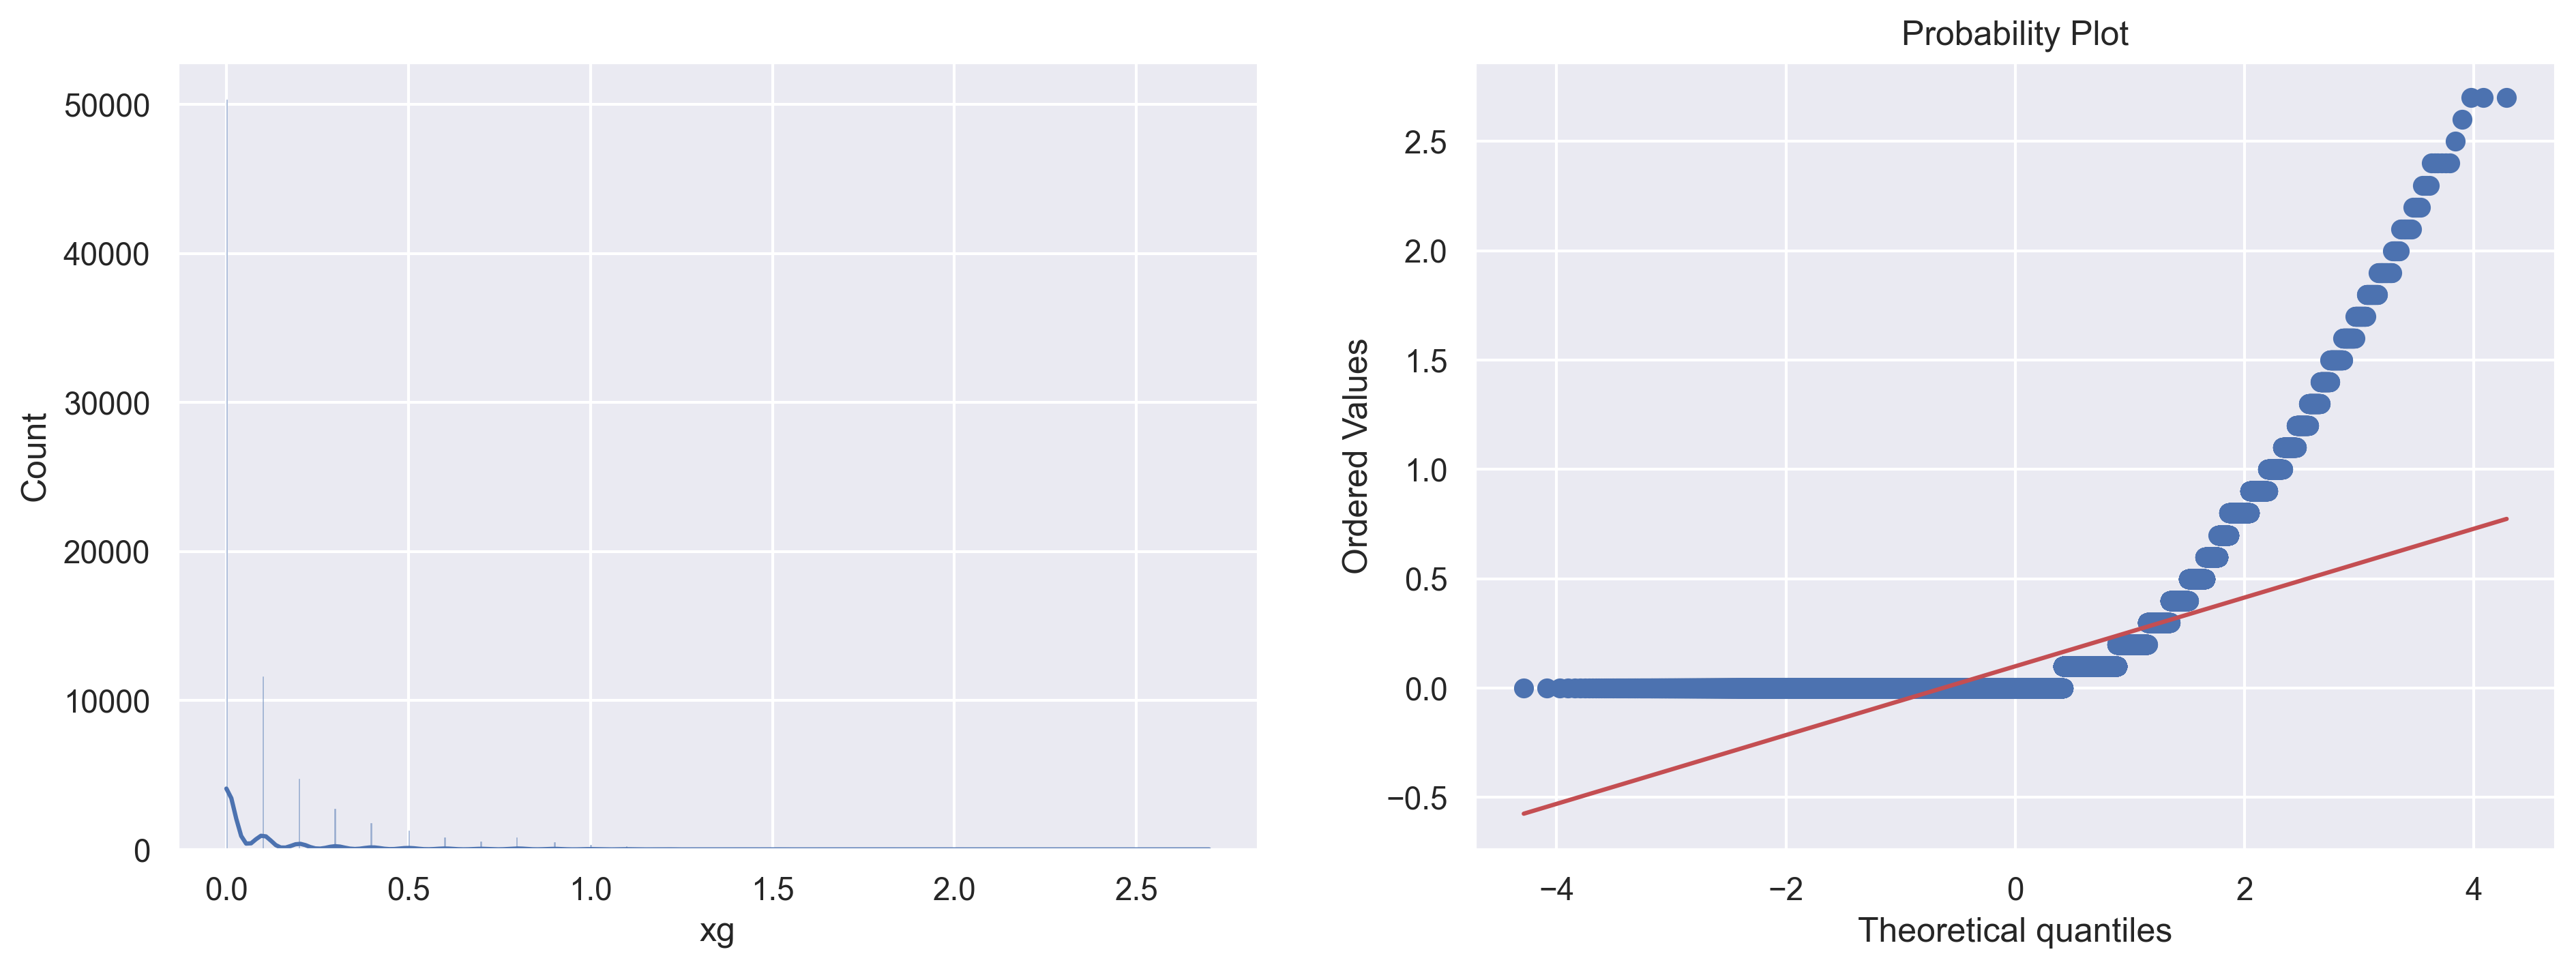

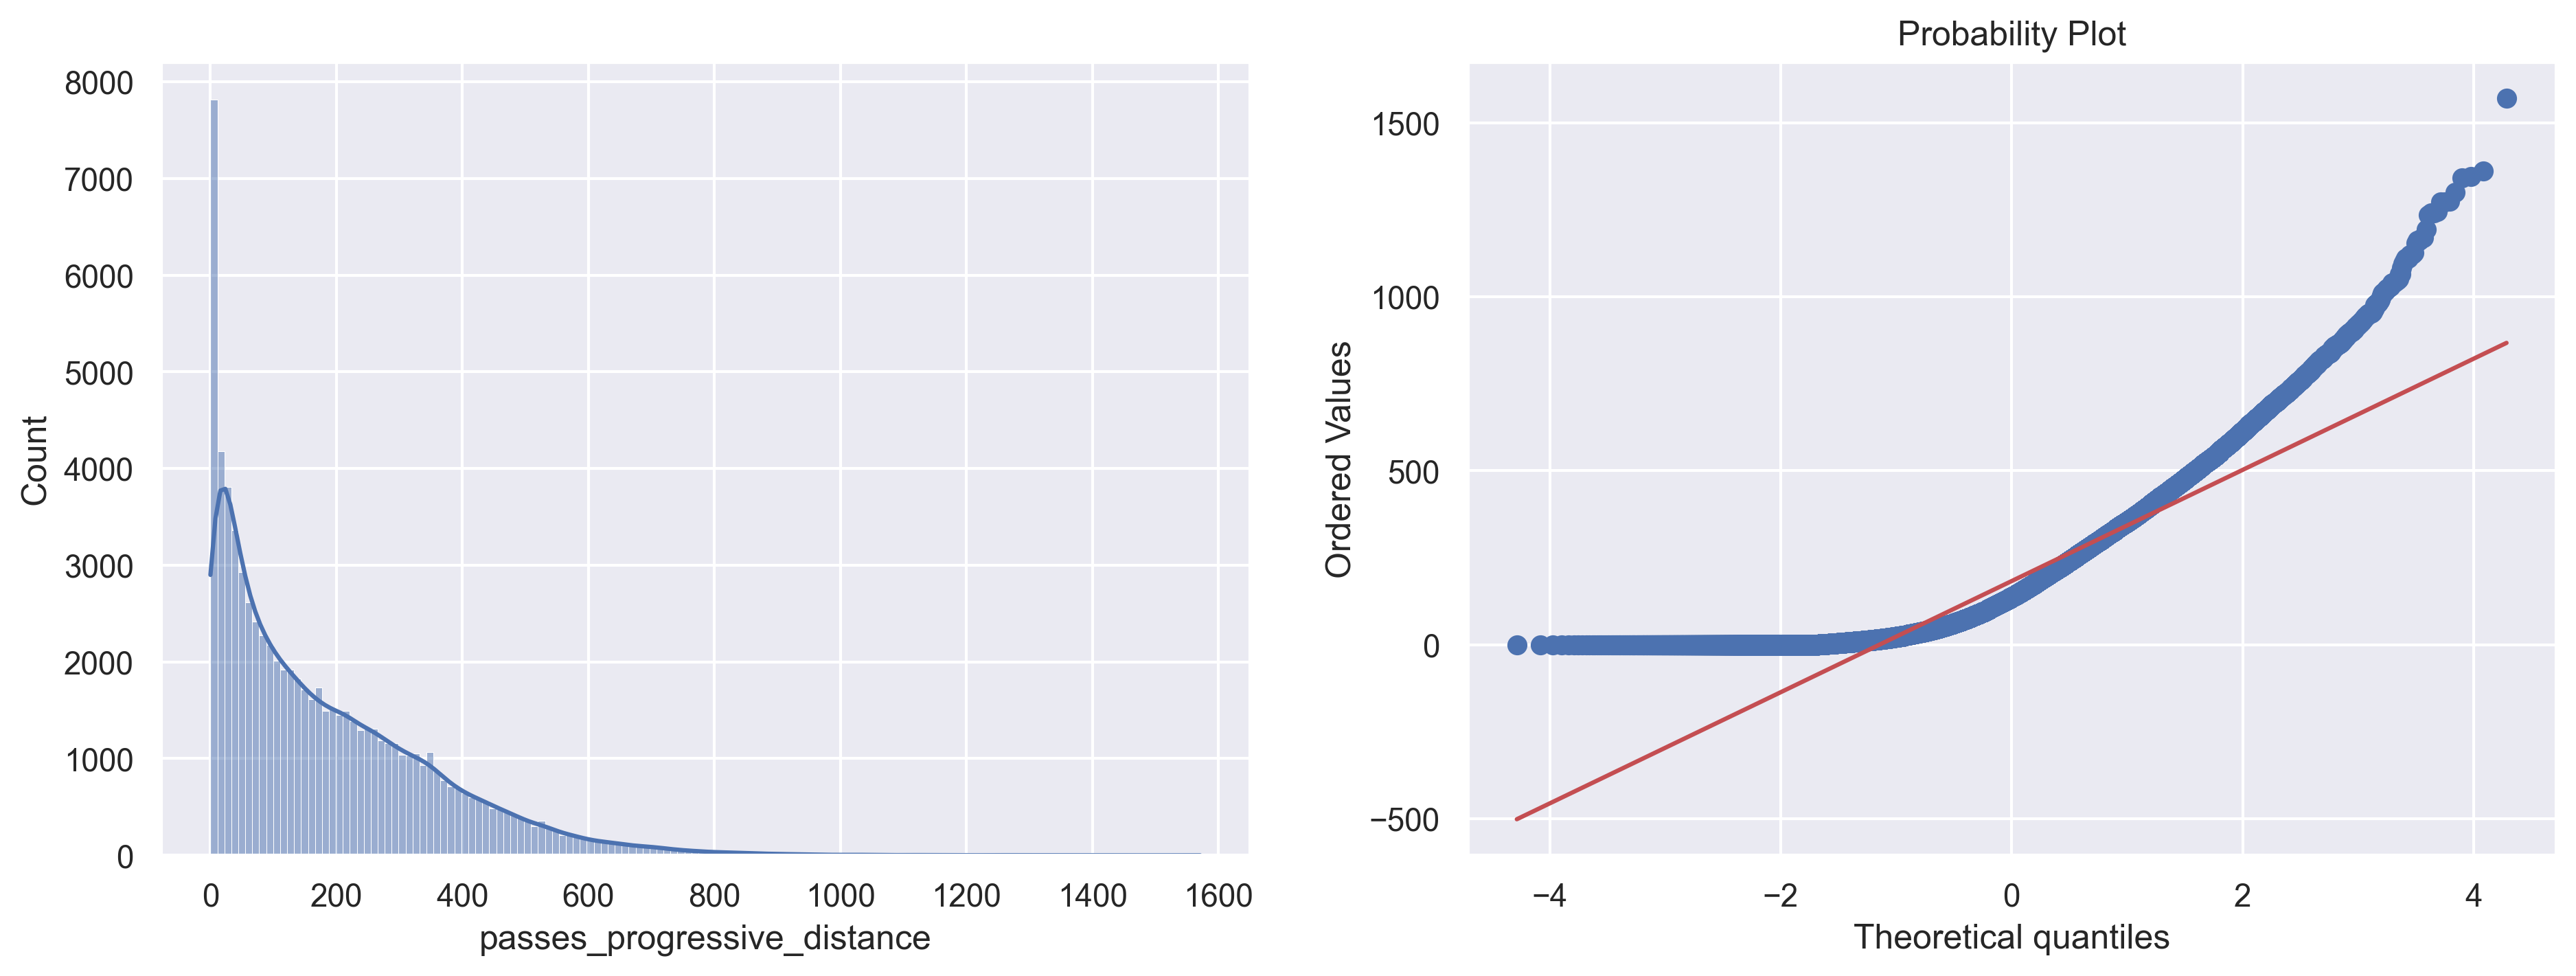

In [12]:
for var in tmp:
    Gaussian_distribution_check(df, var)

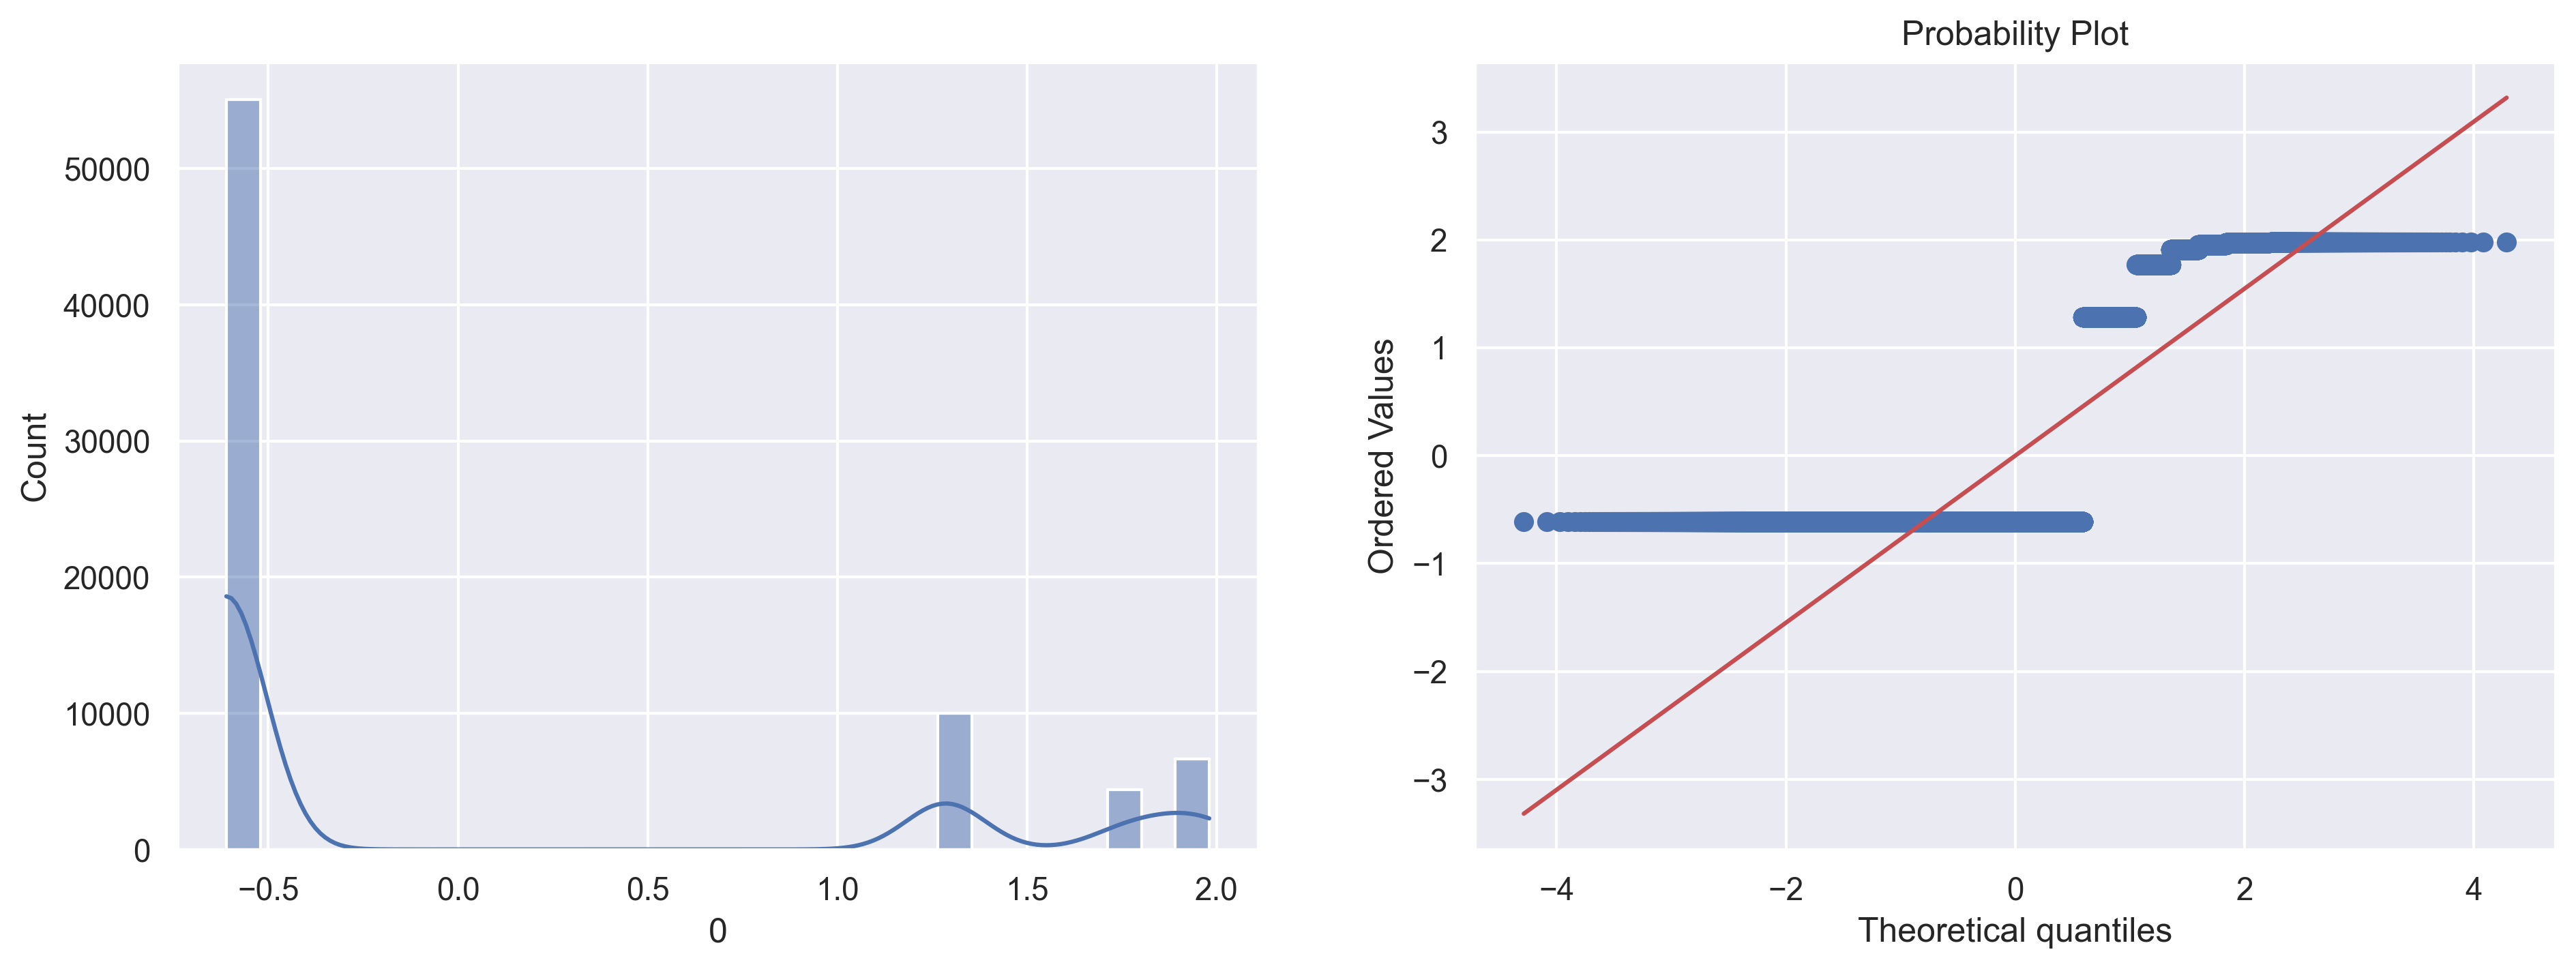

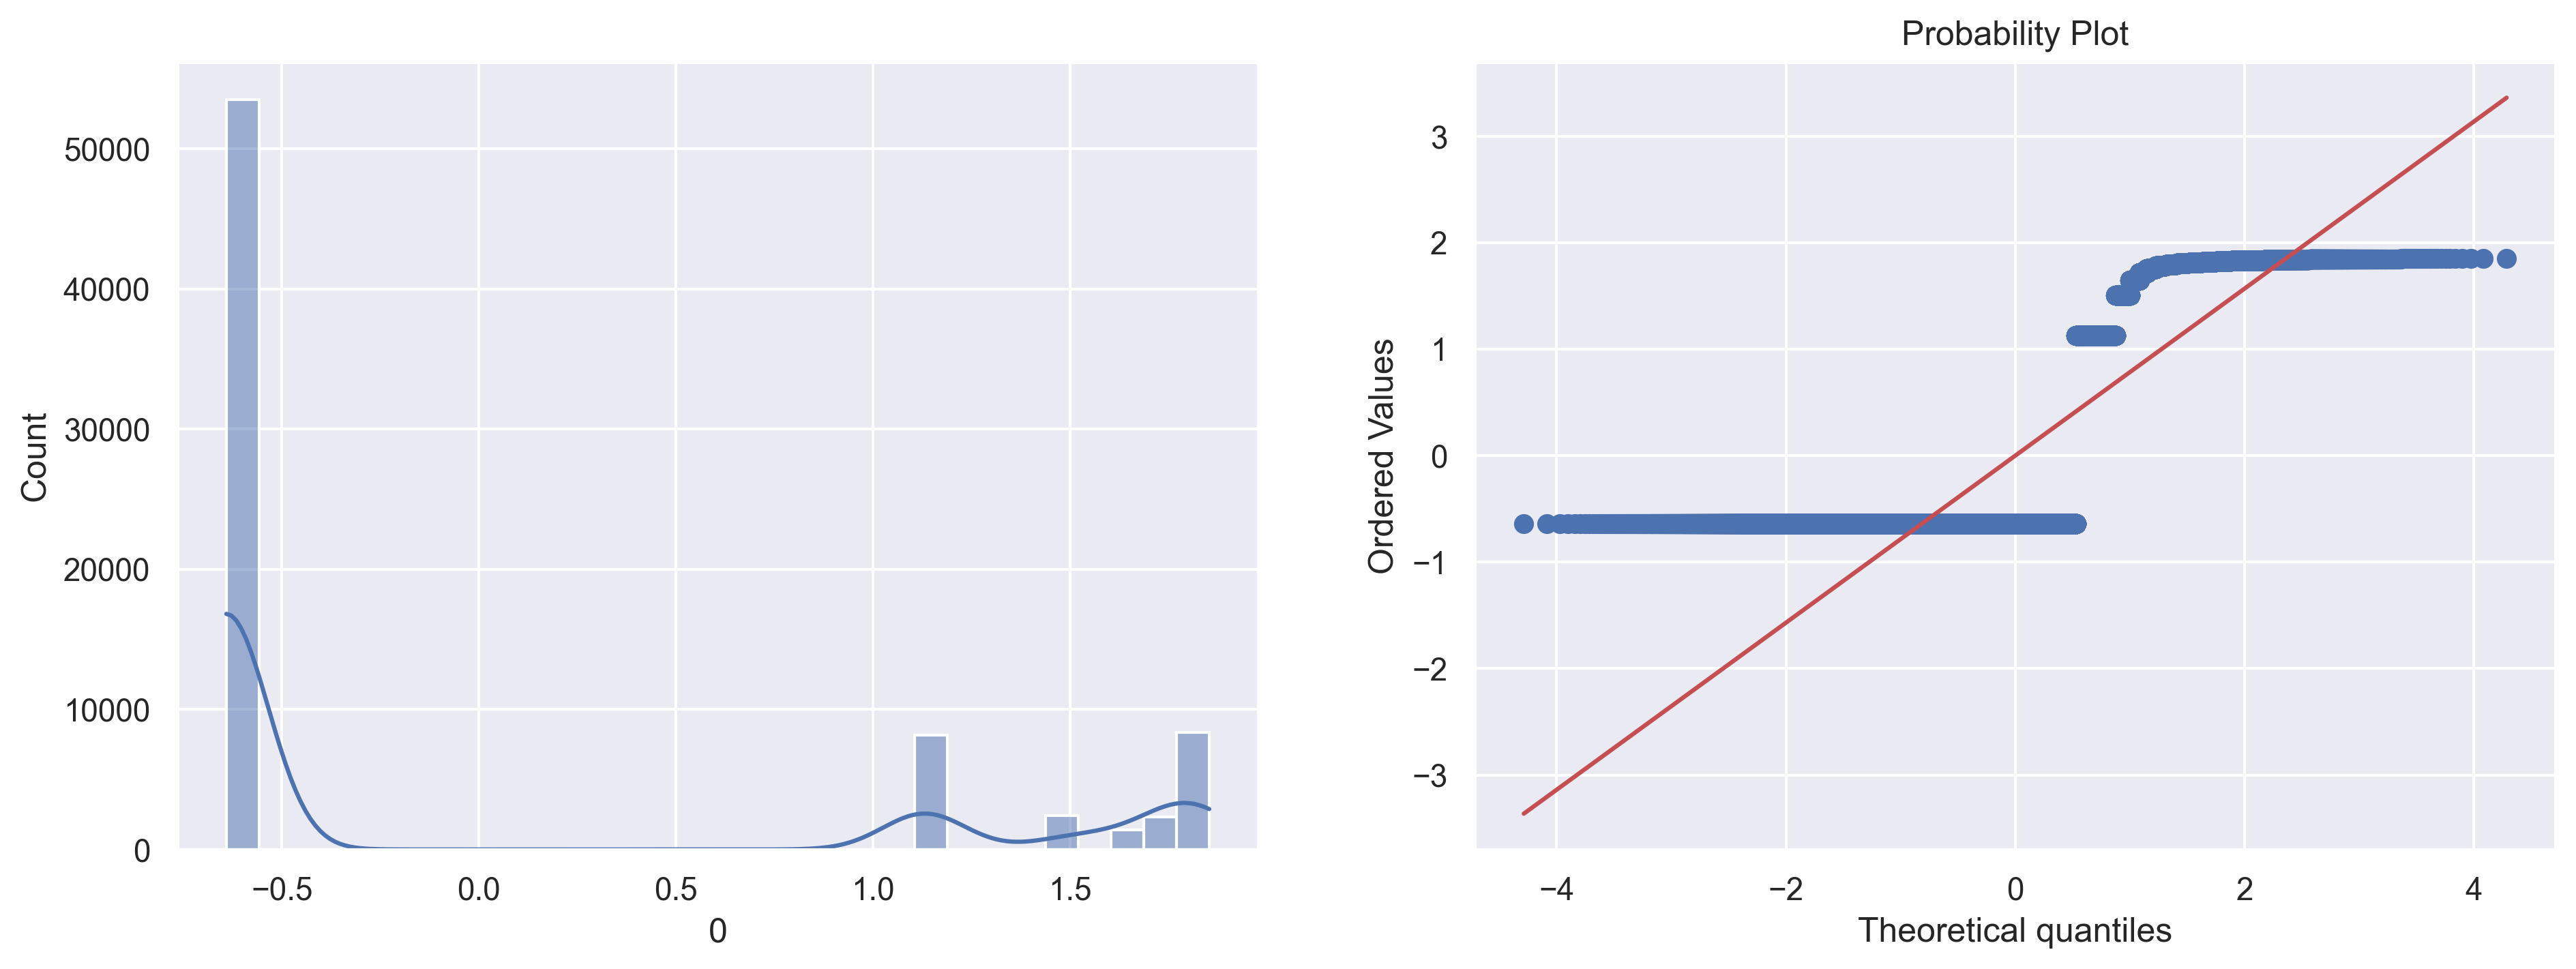

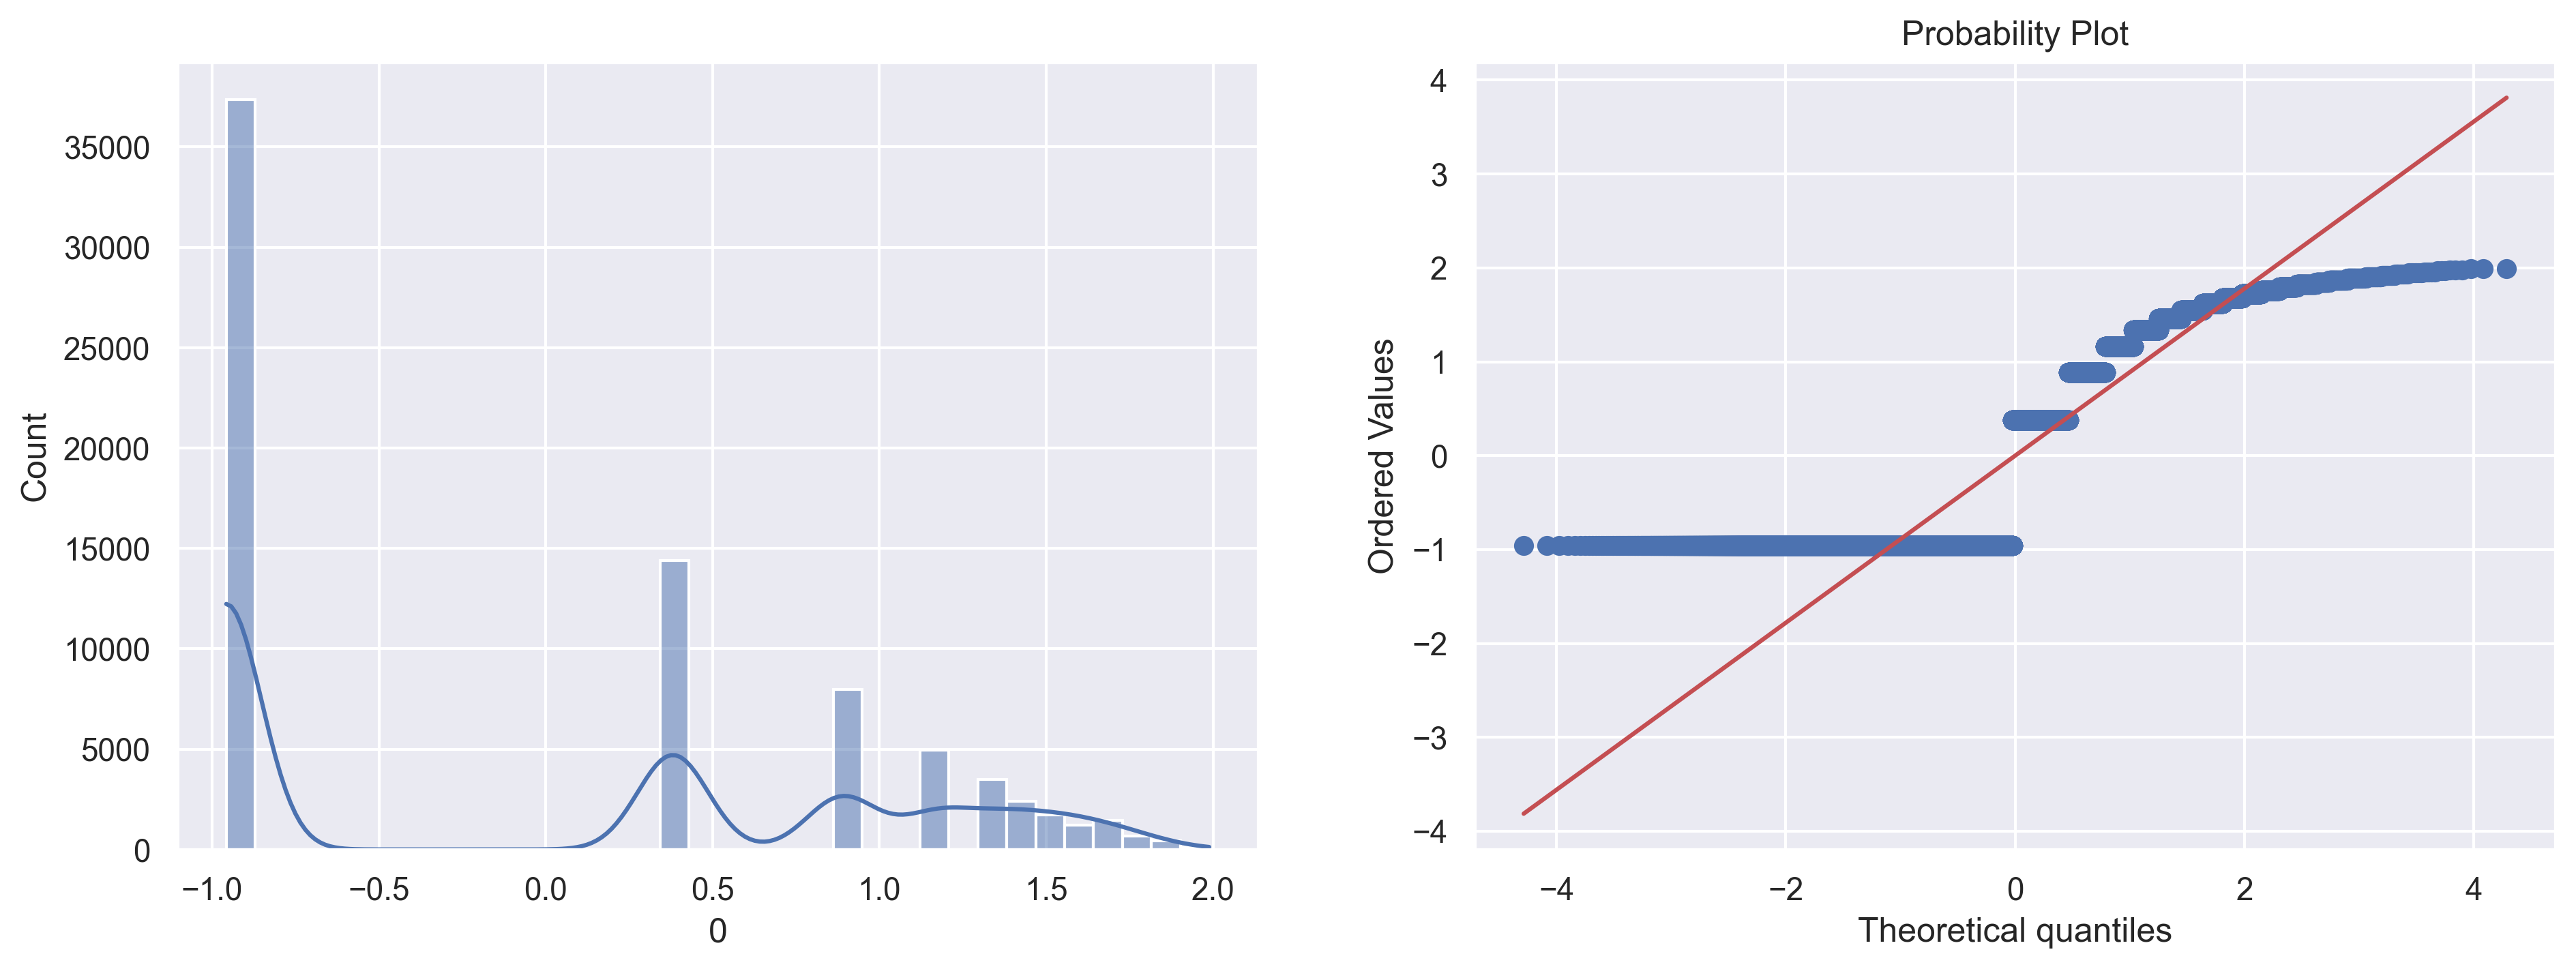

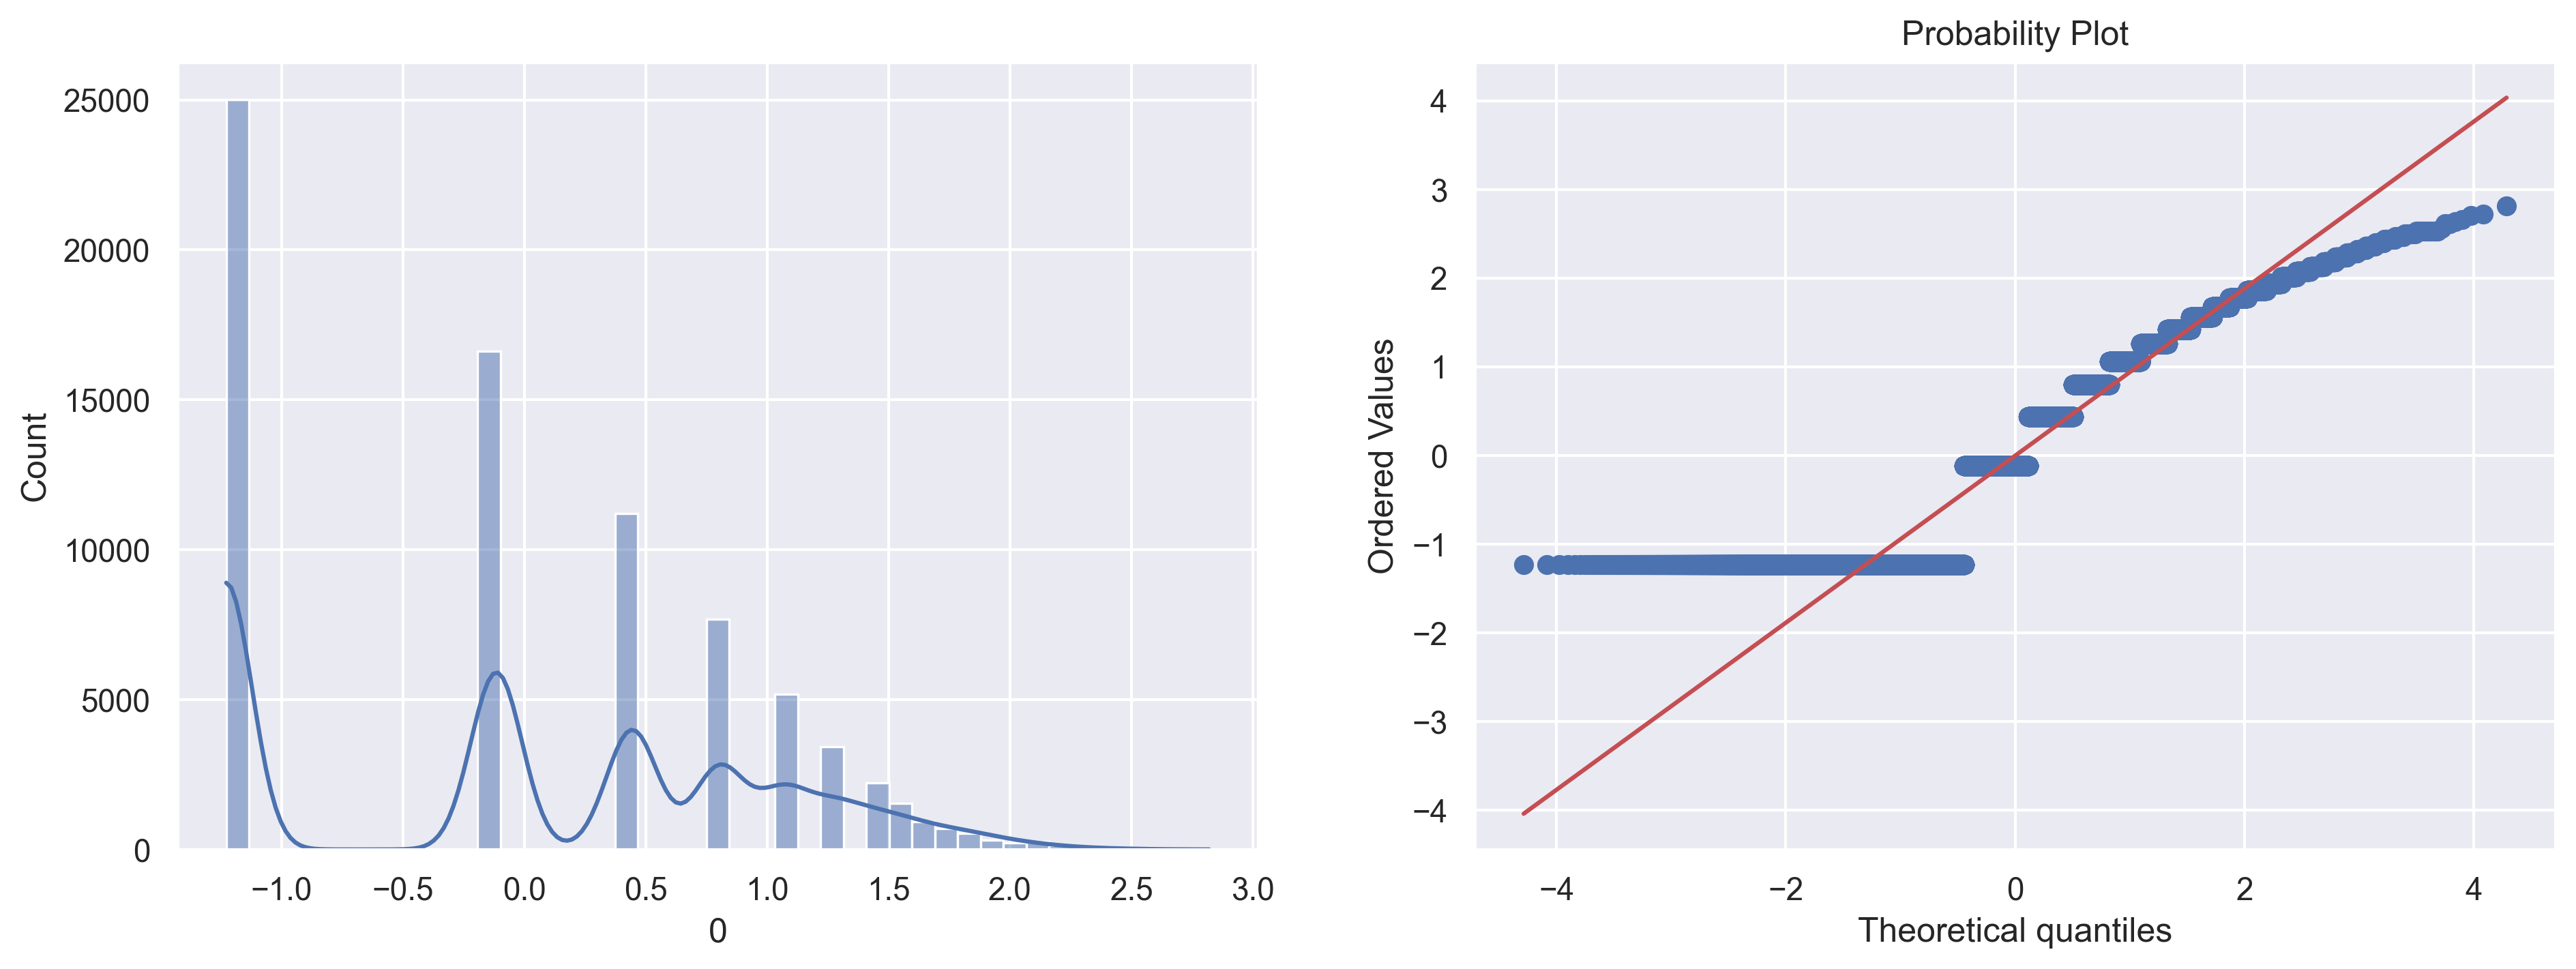

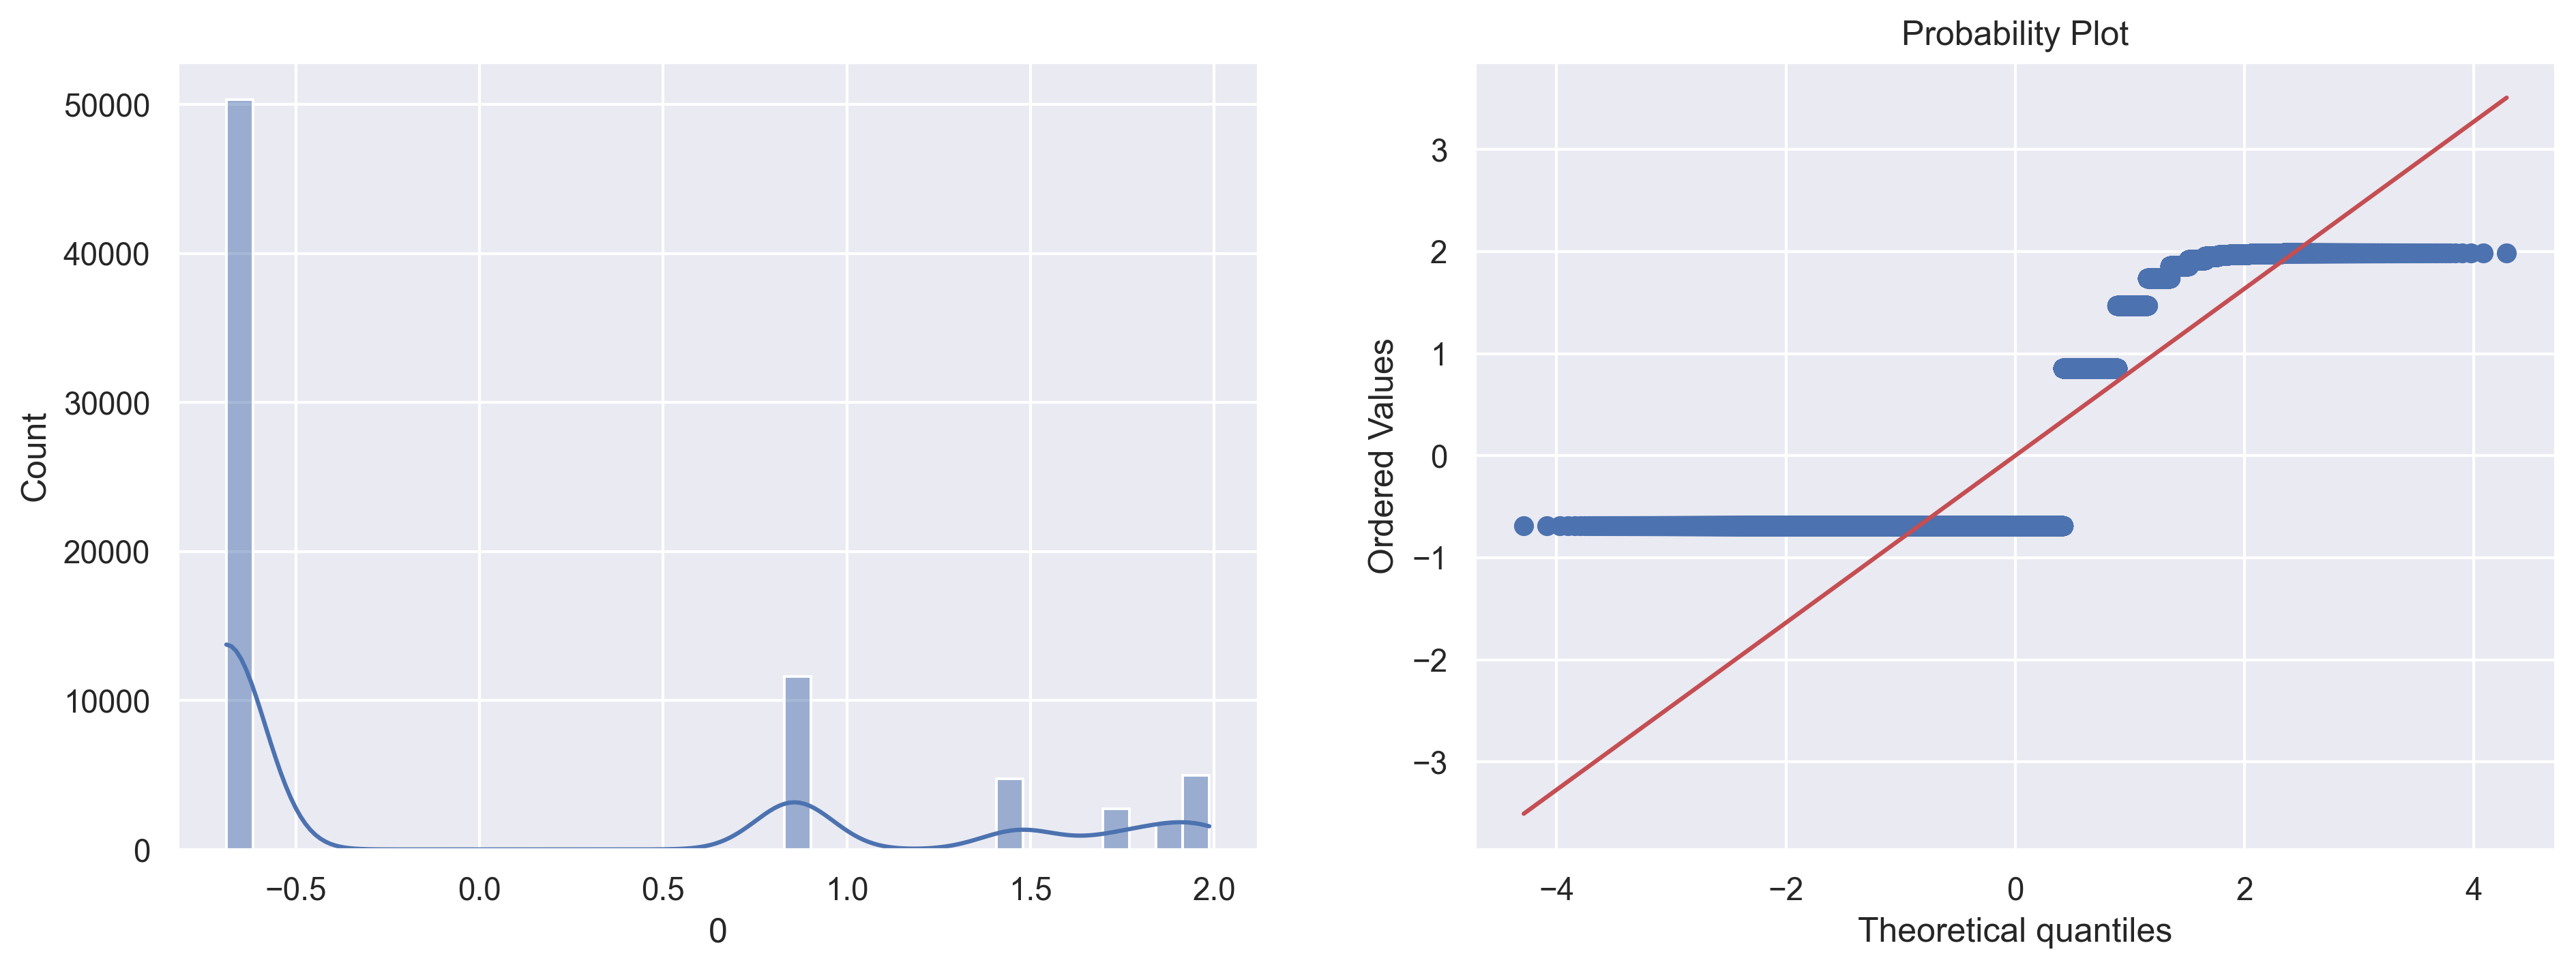

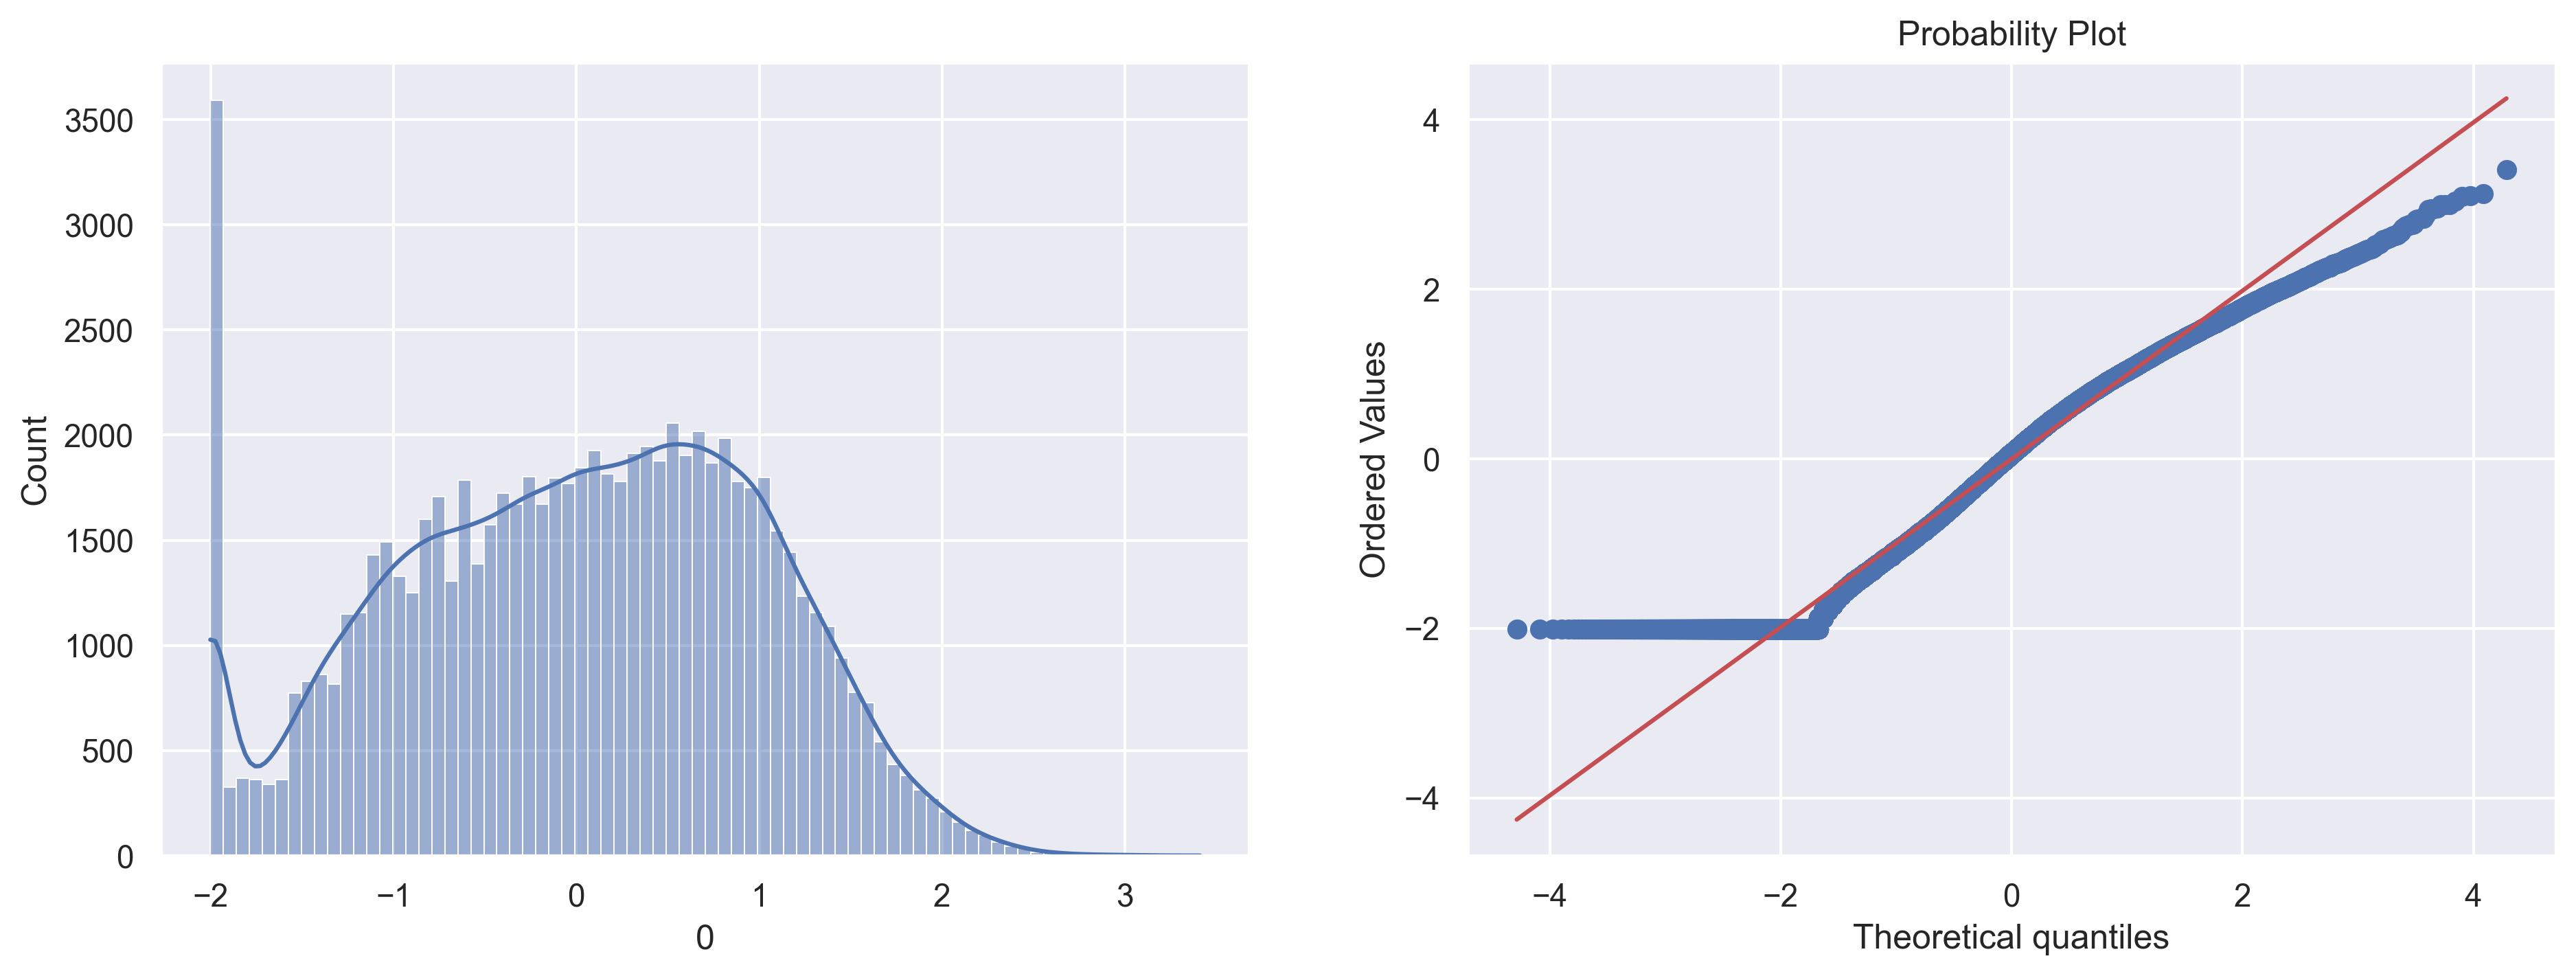

In [13]:
for var in tmp:
    # df_trans = pd.DataFrame(np.log1p(df[column] + np.abs(min(df[column]))))
    # Gaussian_distribution_check(df_trans, column)
    df_trans = pd.DataFrame(power_transform(df[[var]], method='yeo-johnson'))
    Gaussian_distribution_check(df_trans, 0)
        

yeo-johnson transformation seems to work well for passes_progressive_distance. Other variabes have to little unique values to see significant changes in distributions so for them and all exp_var with smaller number of unique values we will use min-max scaling

In [14]:
min_max_scaler = MinMaxScaler()

df['passes_progressive_distance'] = power_transform(df[['passes_progressive_distance']], method='yeo-johnson')
df[exp_var] = min_max_scaler.fit_transform(df[exp_var])

### 2nd group

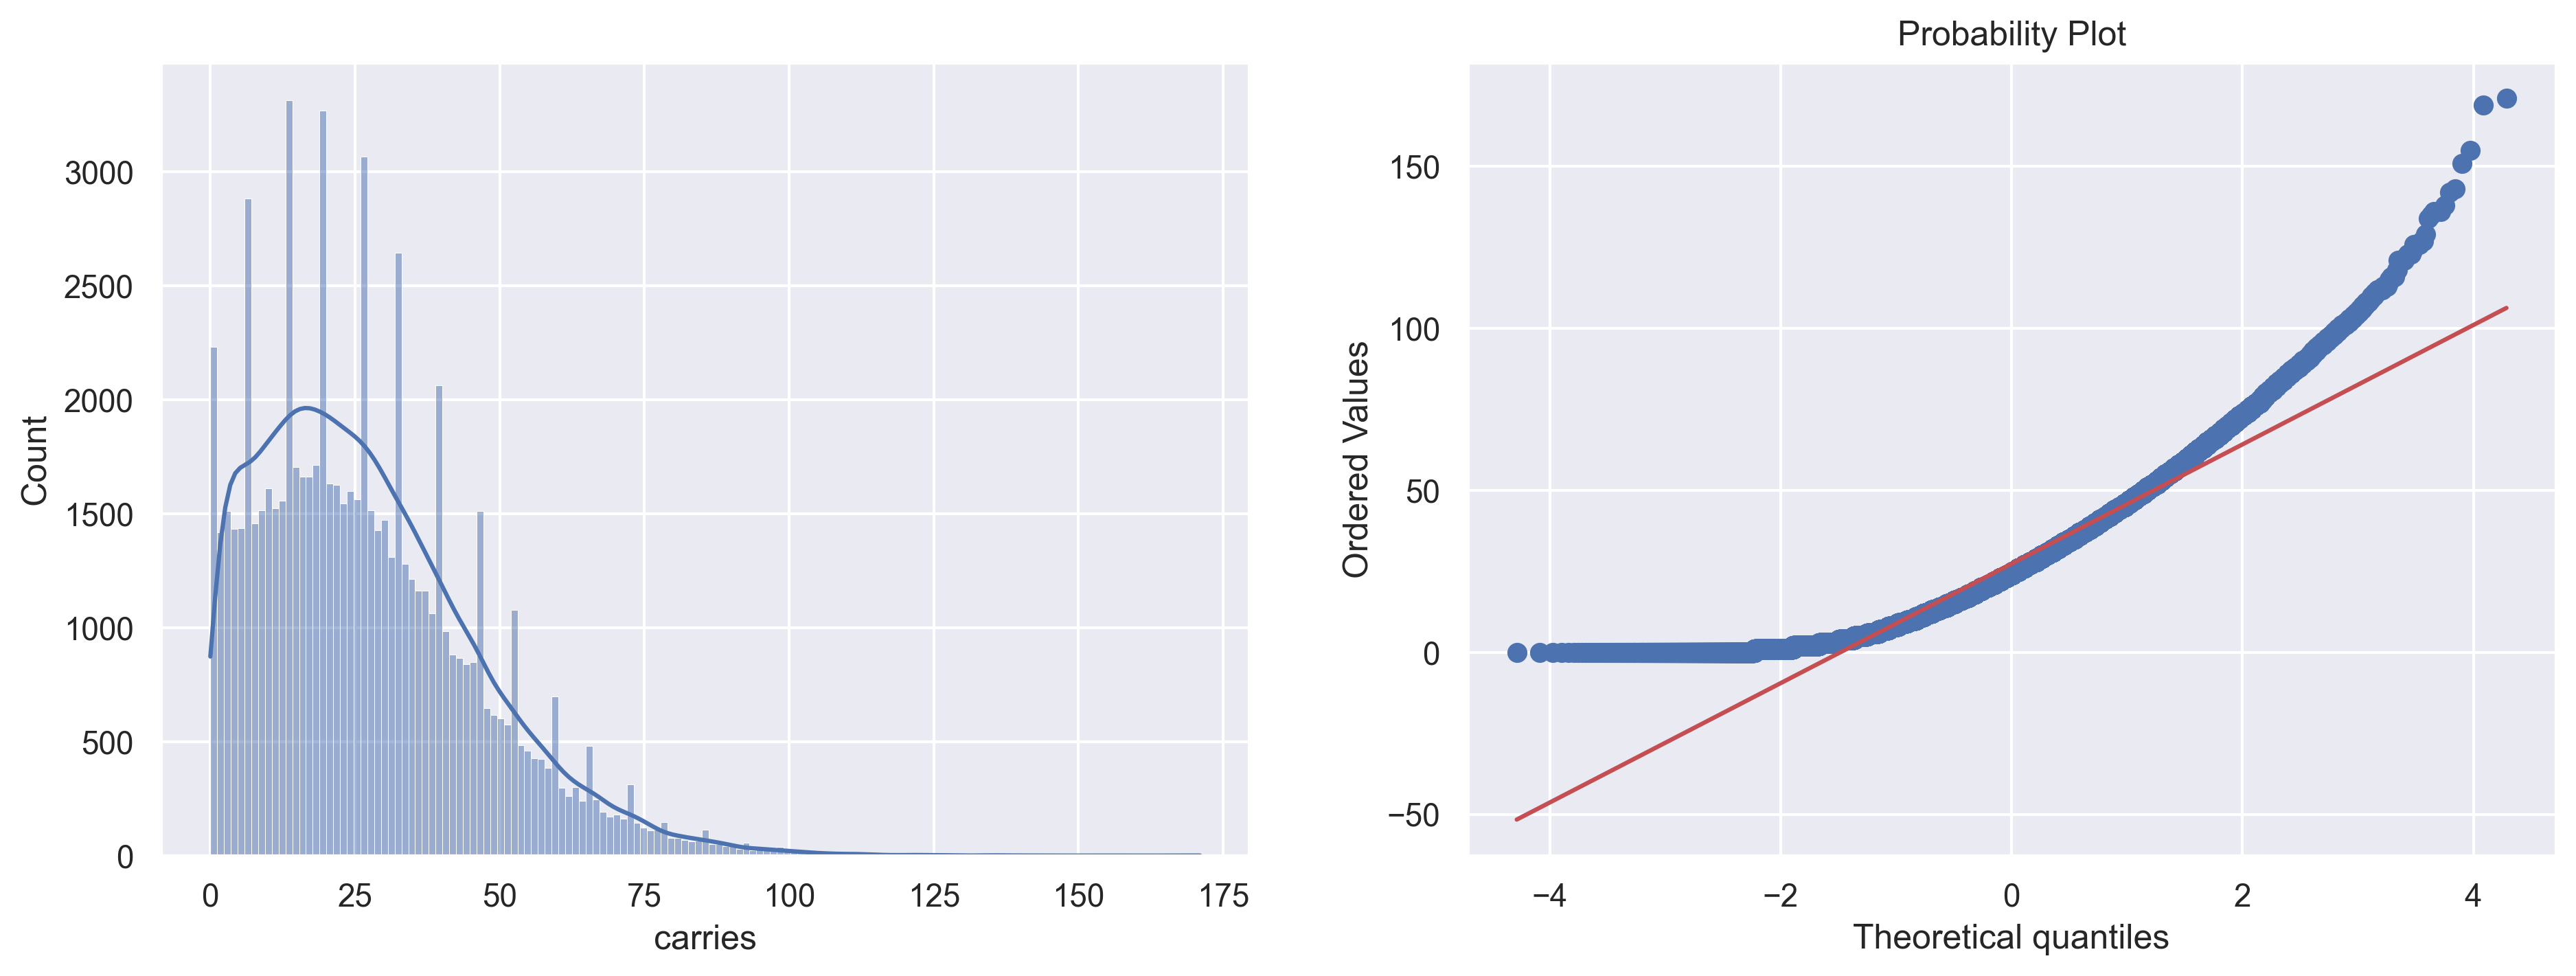

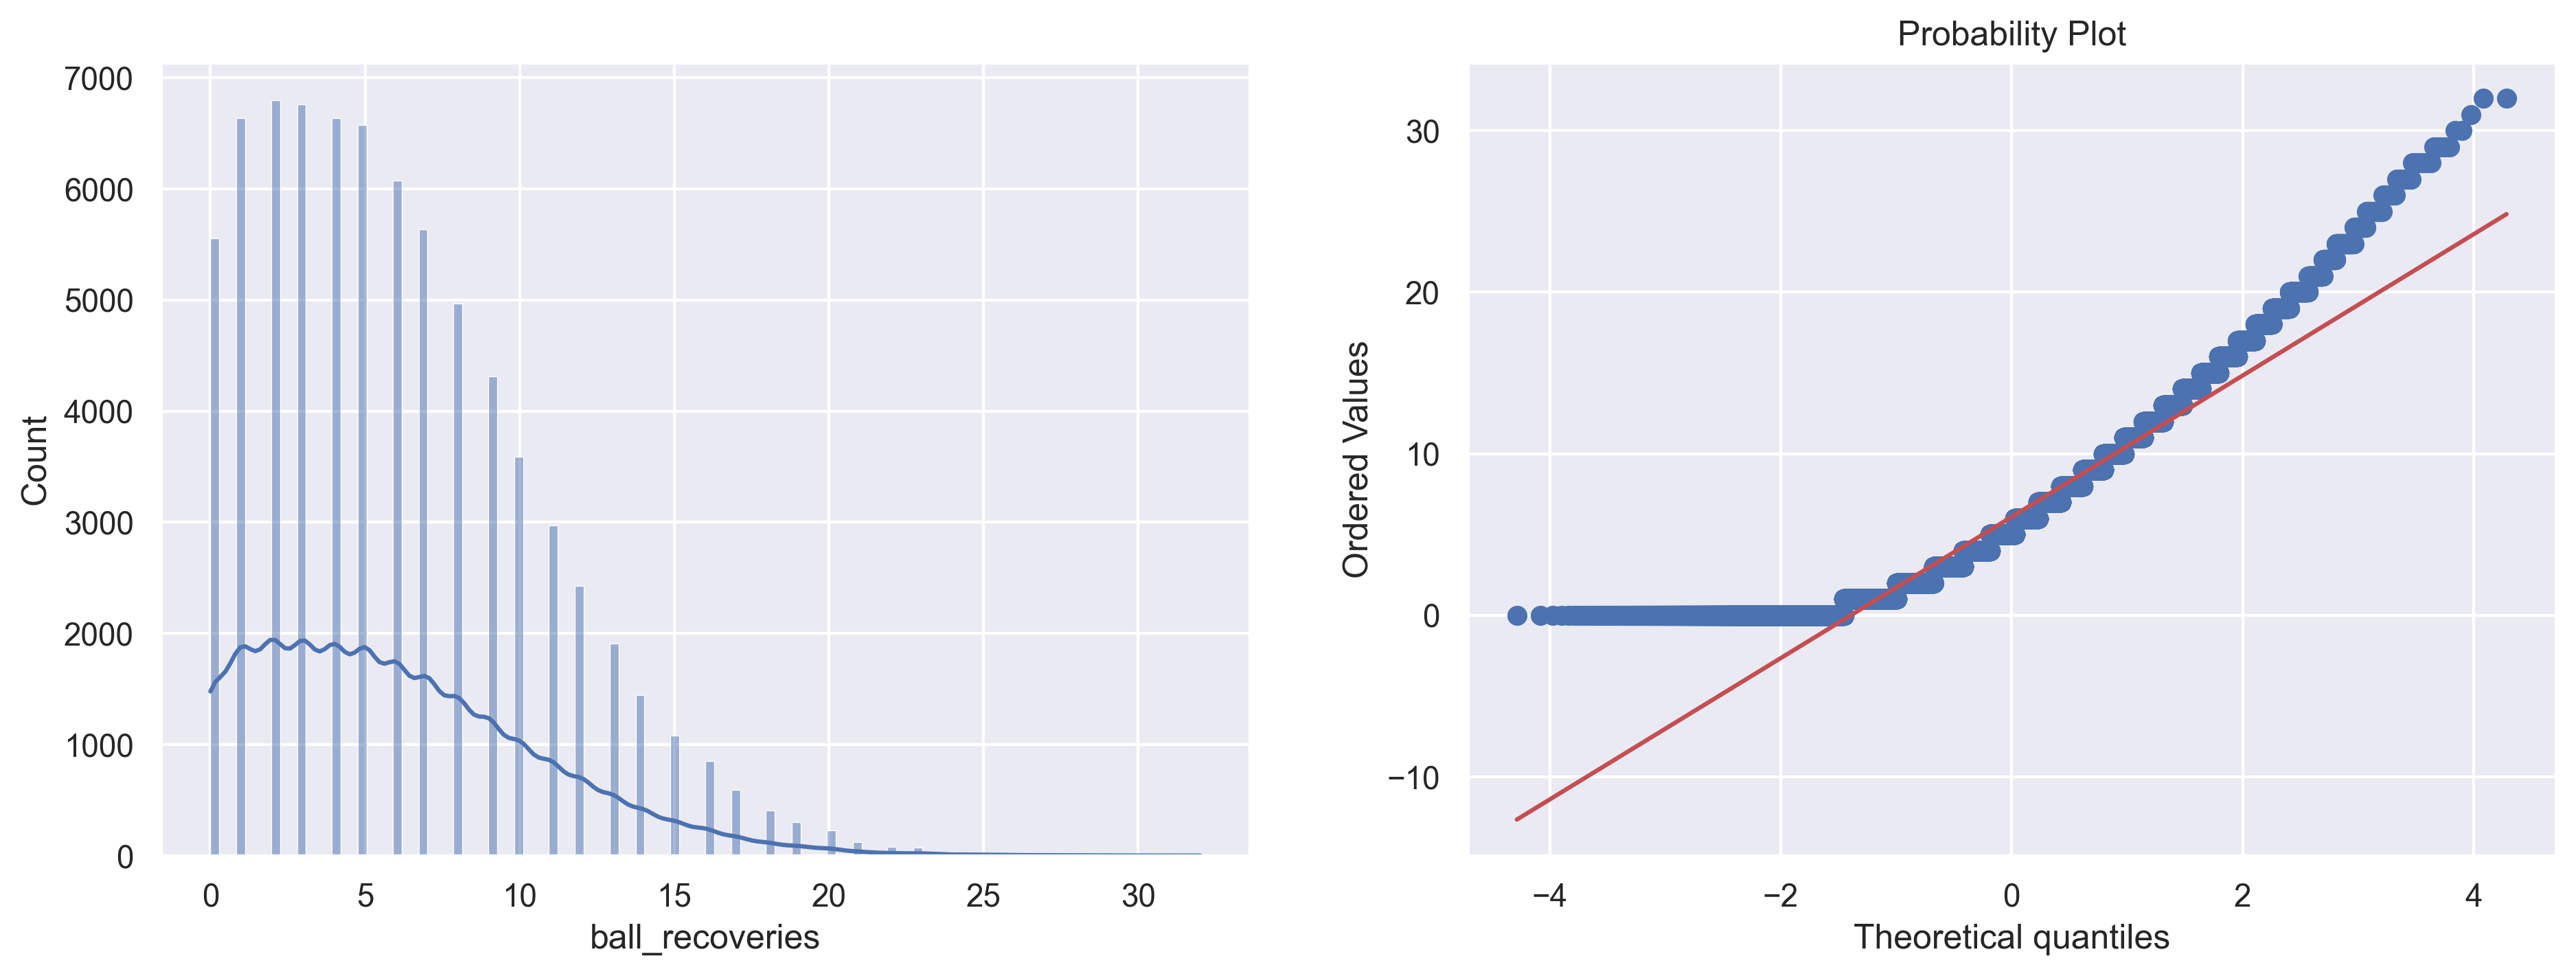

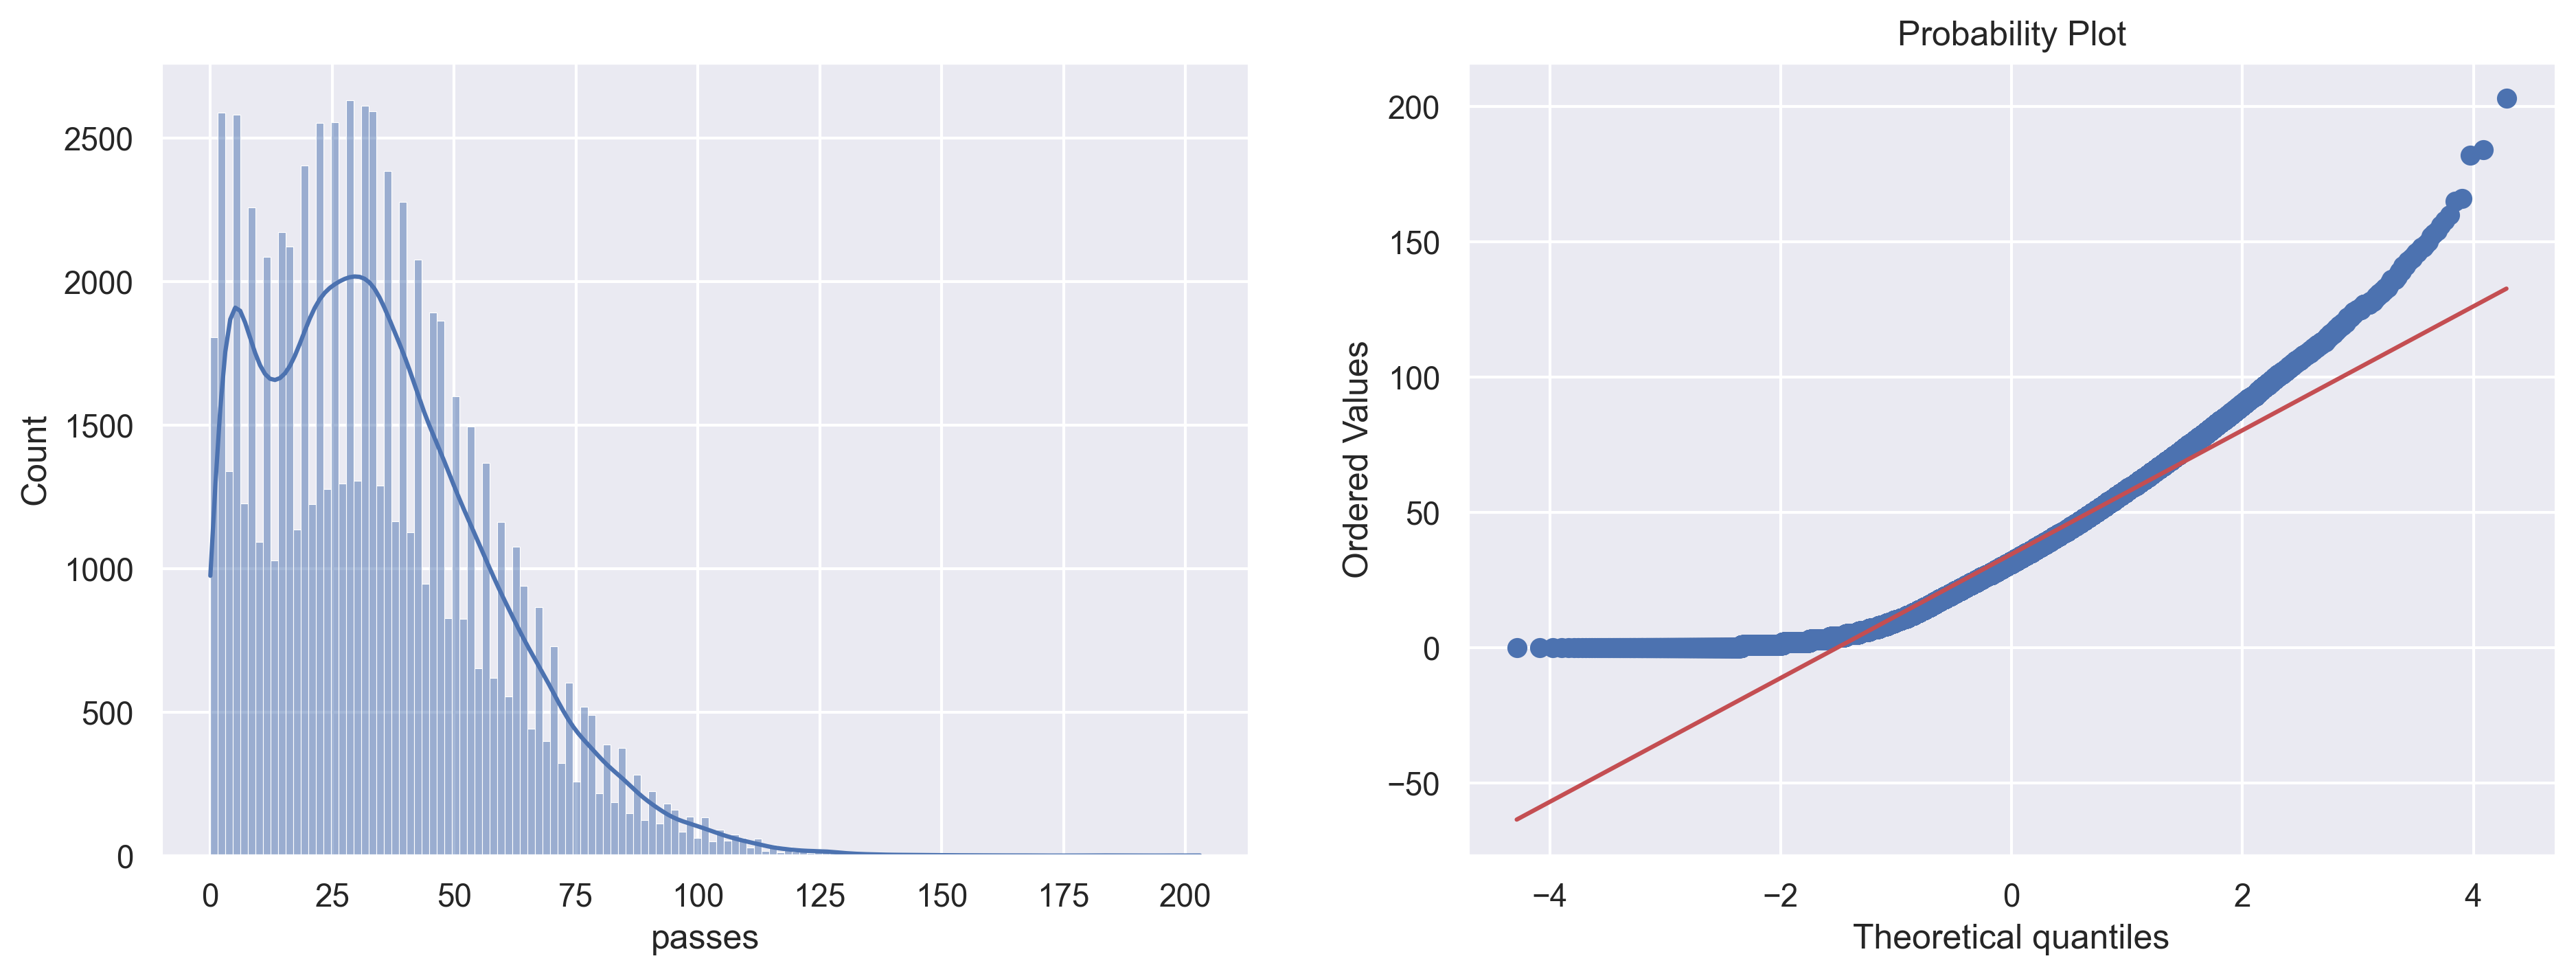

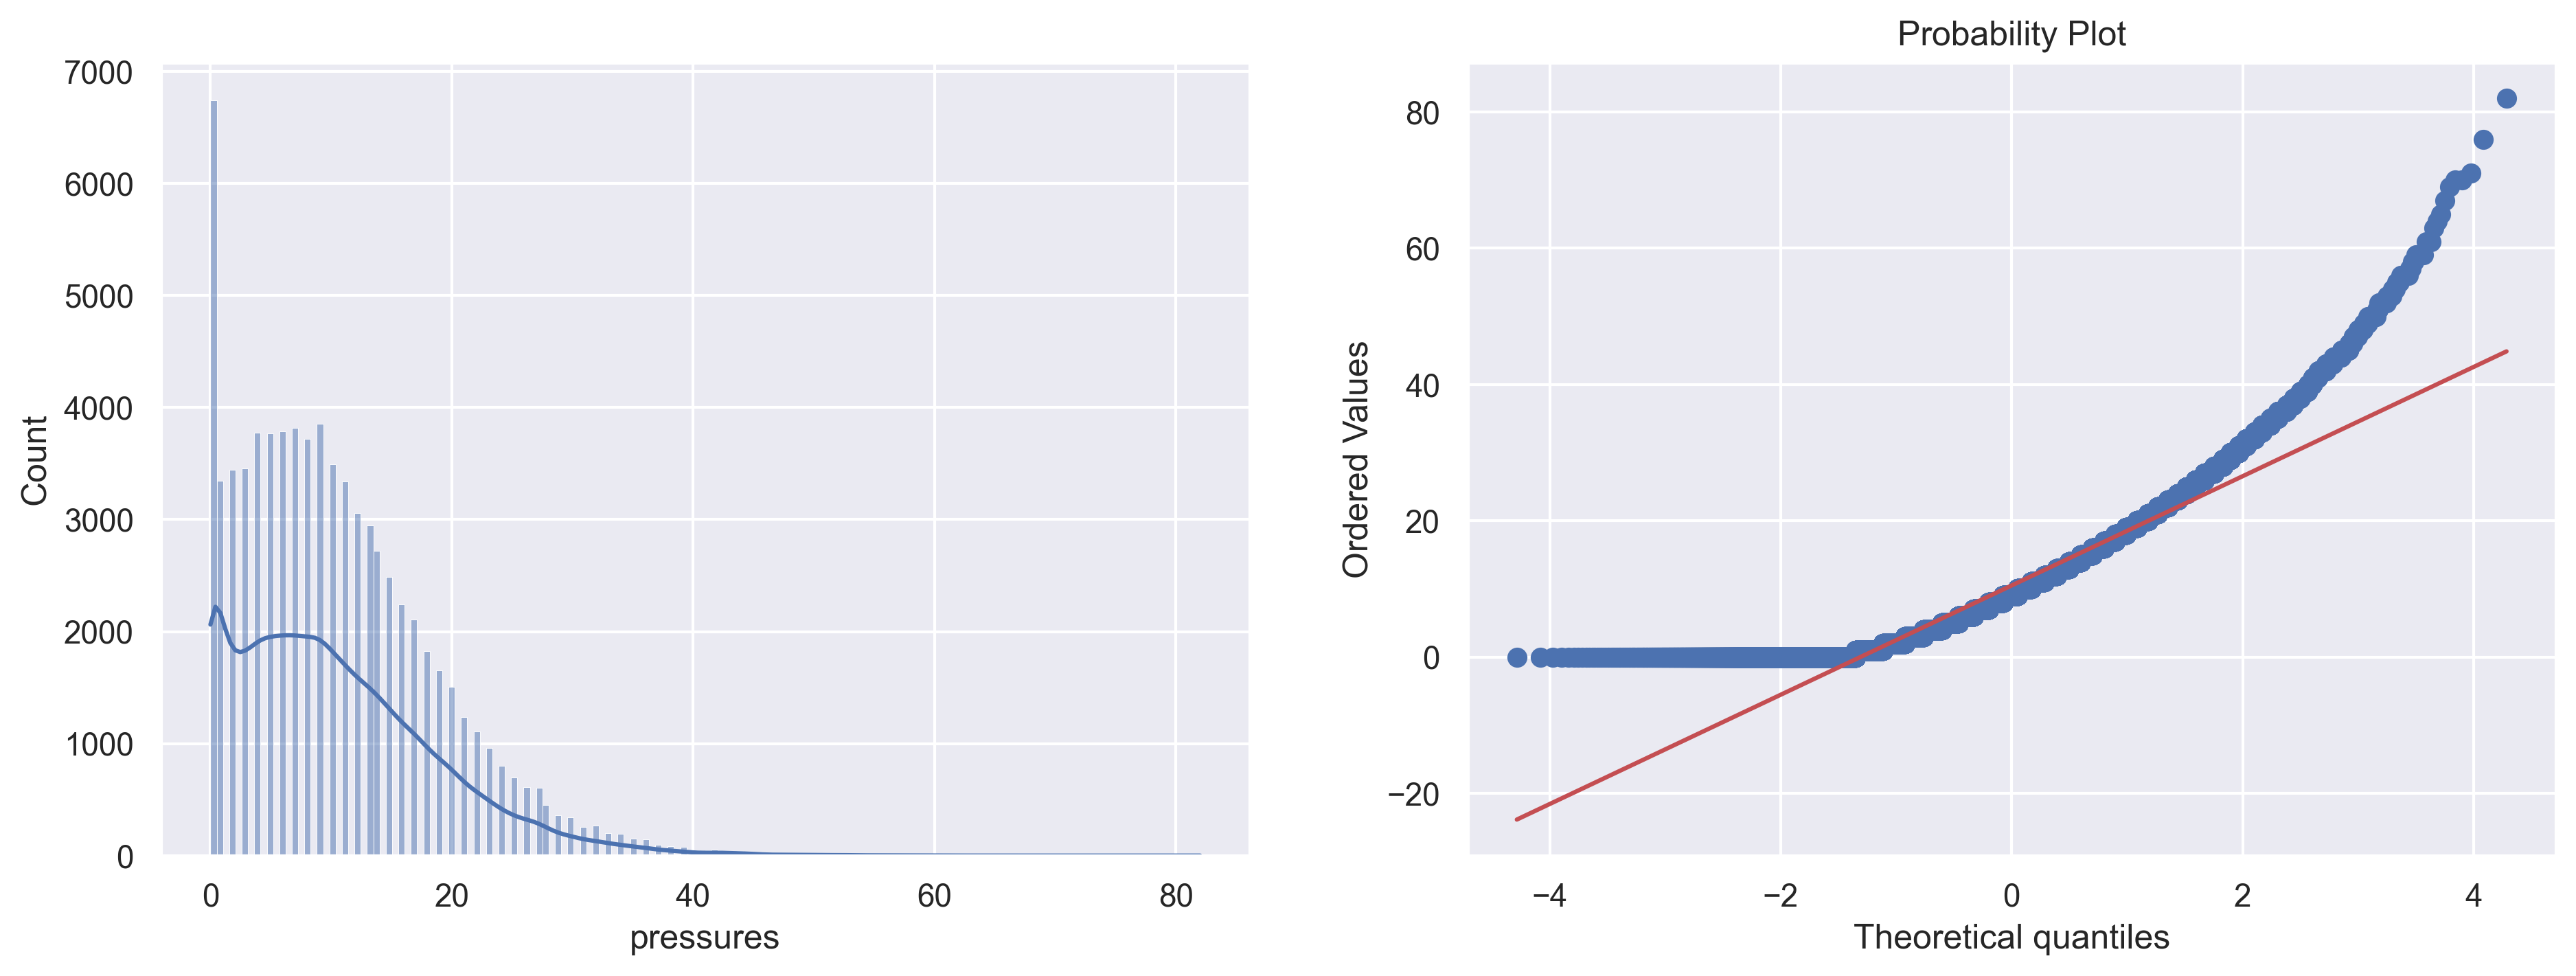

In [15]:
for var in skewed_var:
    Gaussian_distribution_check(df, var)

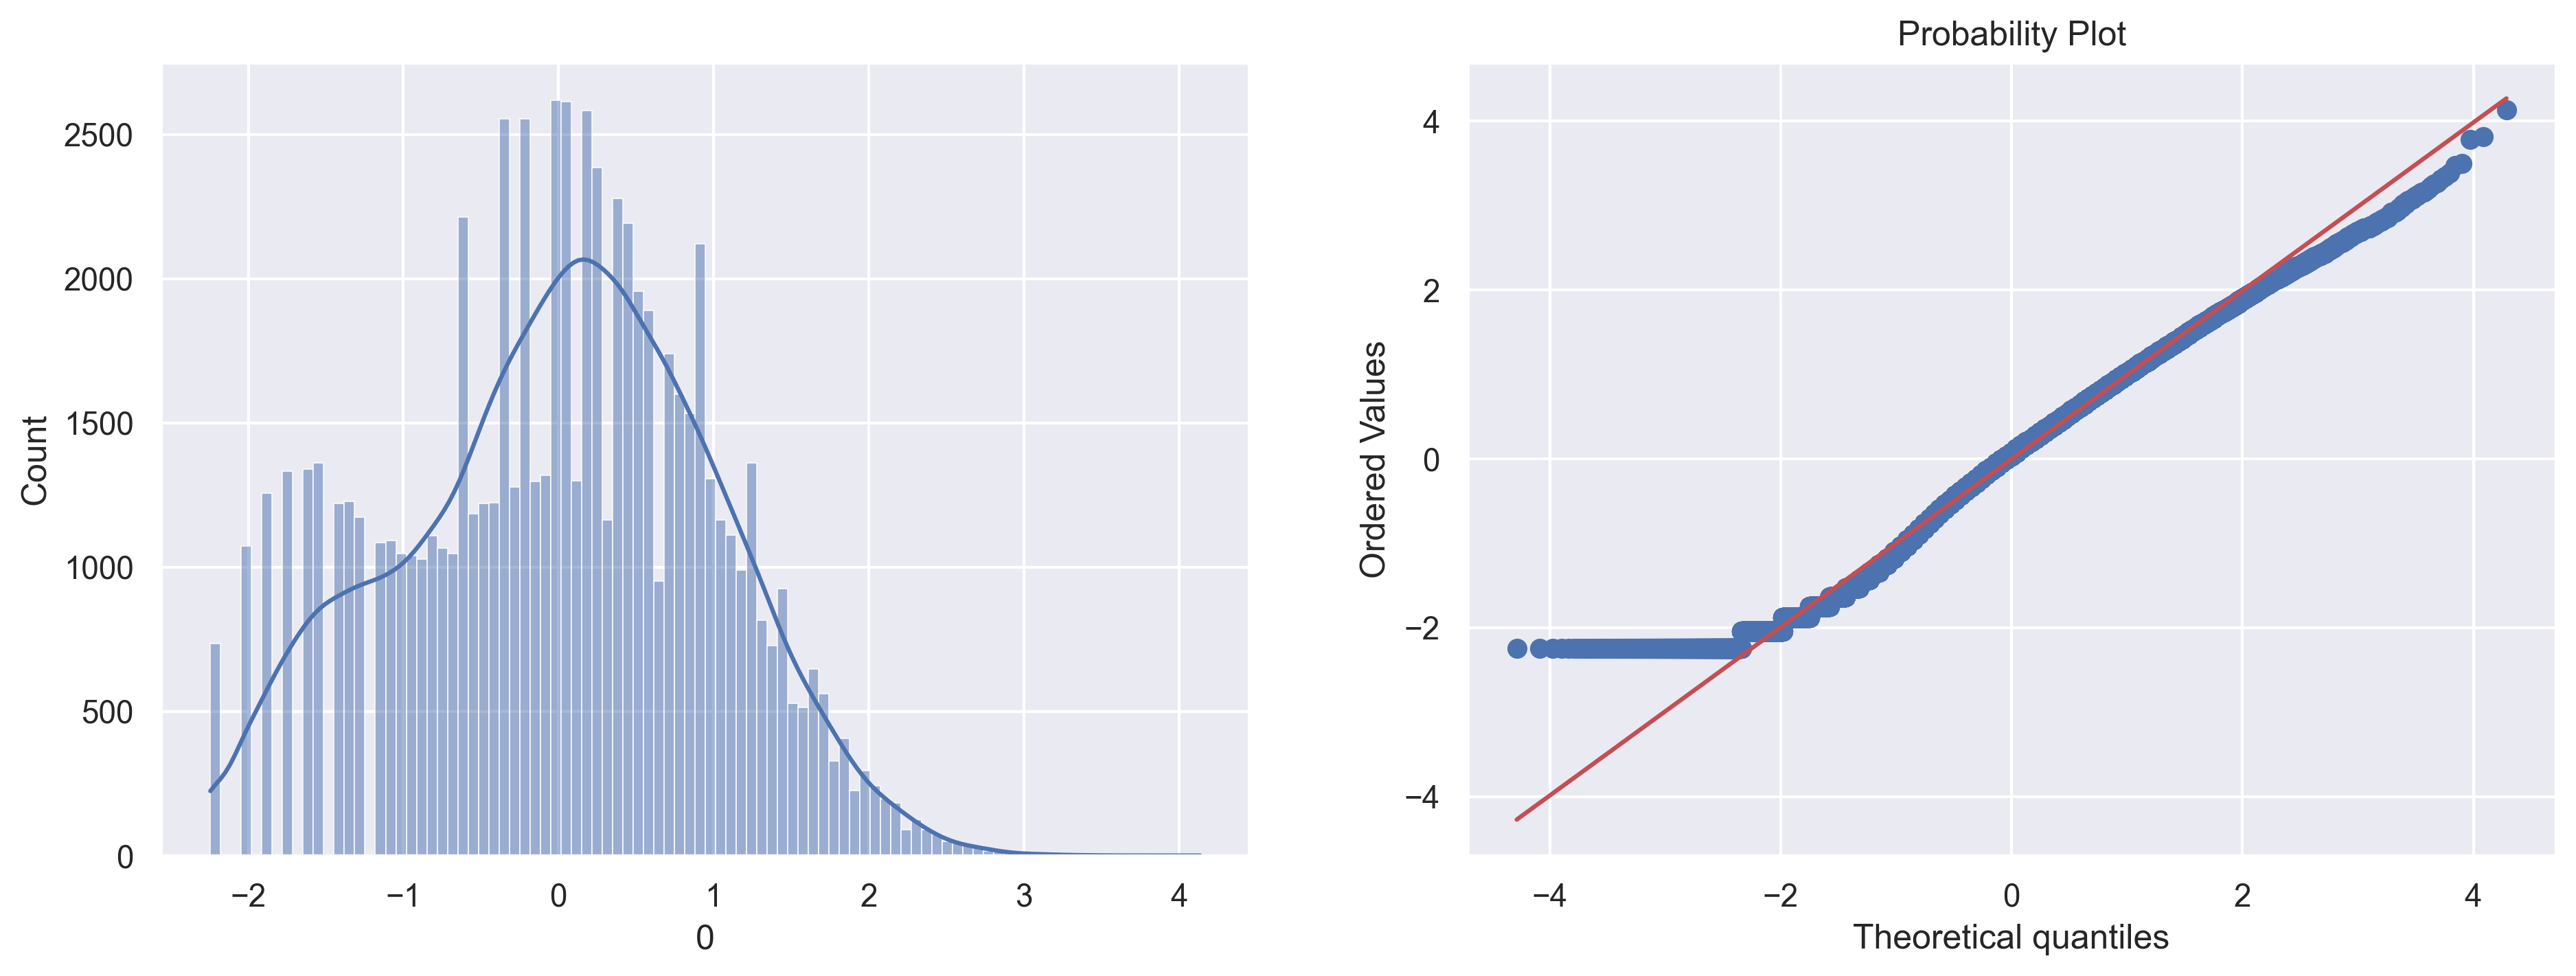

In [16]:
df_trans = pd.DataFrame(power_transform(df[['passes']], method='yeo-johnson'))
Gaussian_distribution_check(df_trans, 0)

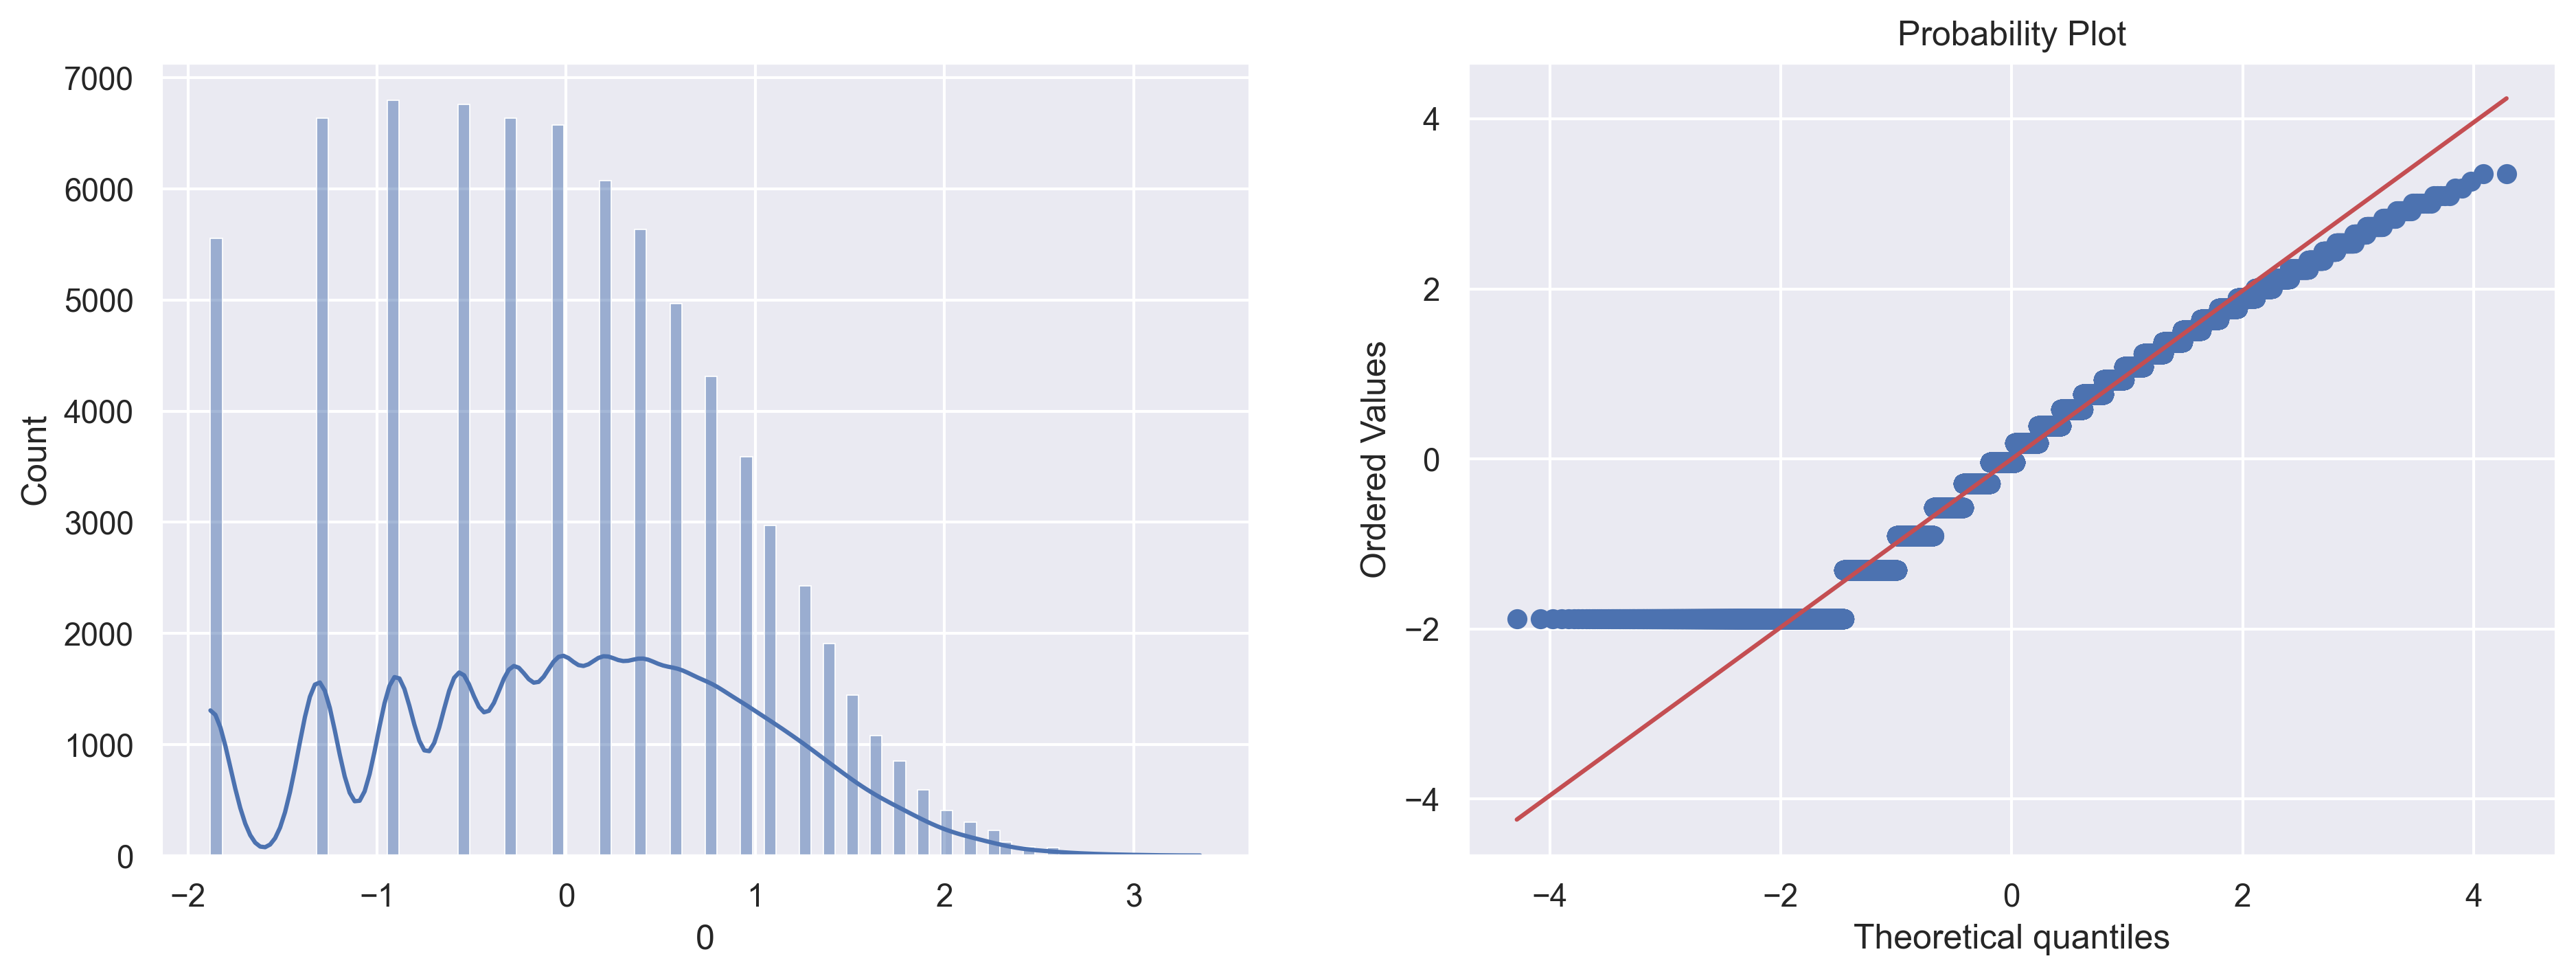

In [17]:
df_trans = pd.DataFrame(power_transform(df[['ball_recoveries']], method='yeo-johnson'))
Gaussian_distribution_check(df_trans, 0)

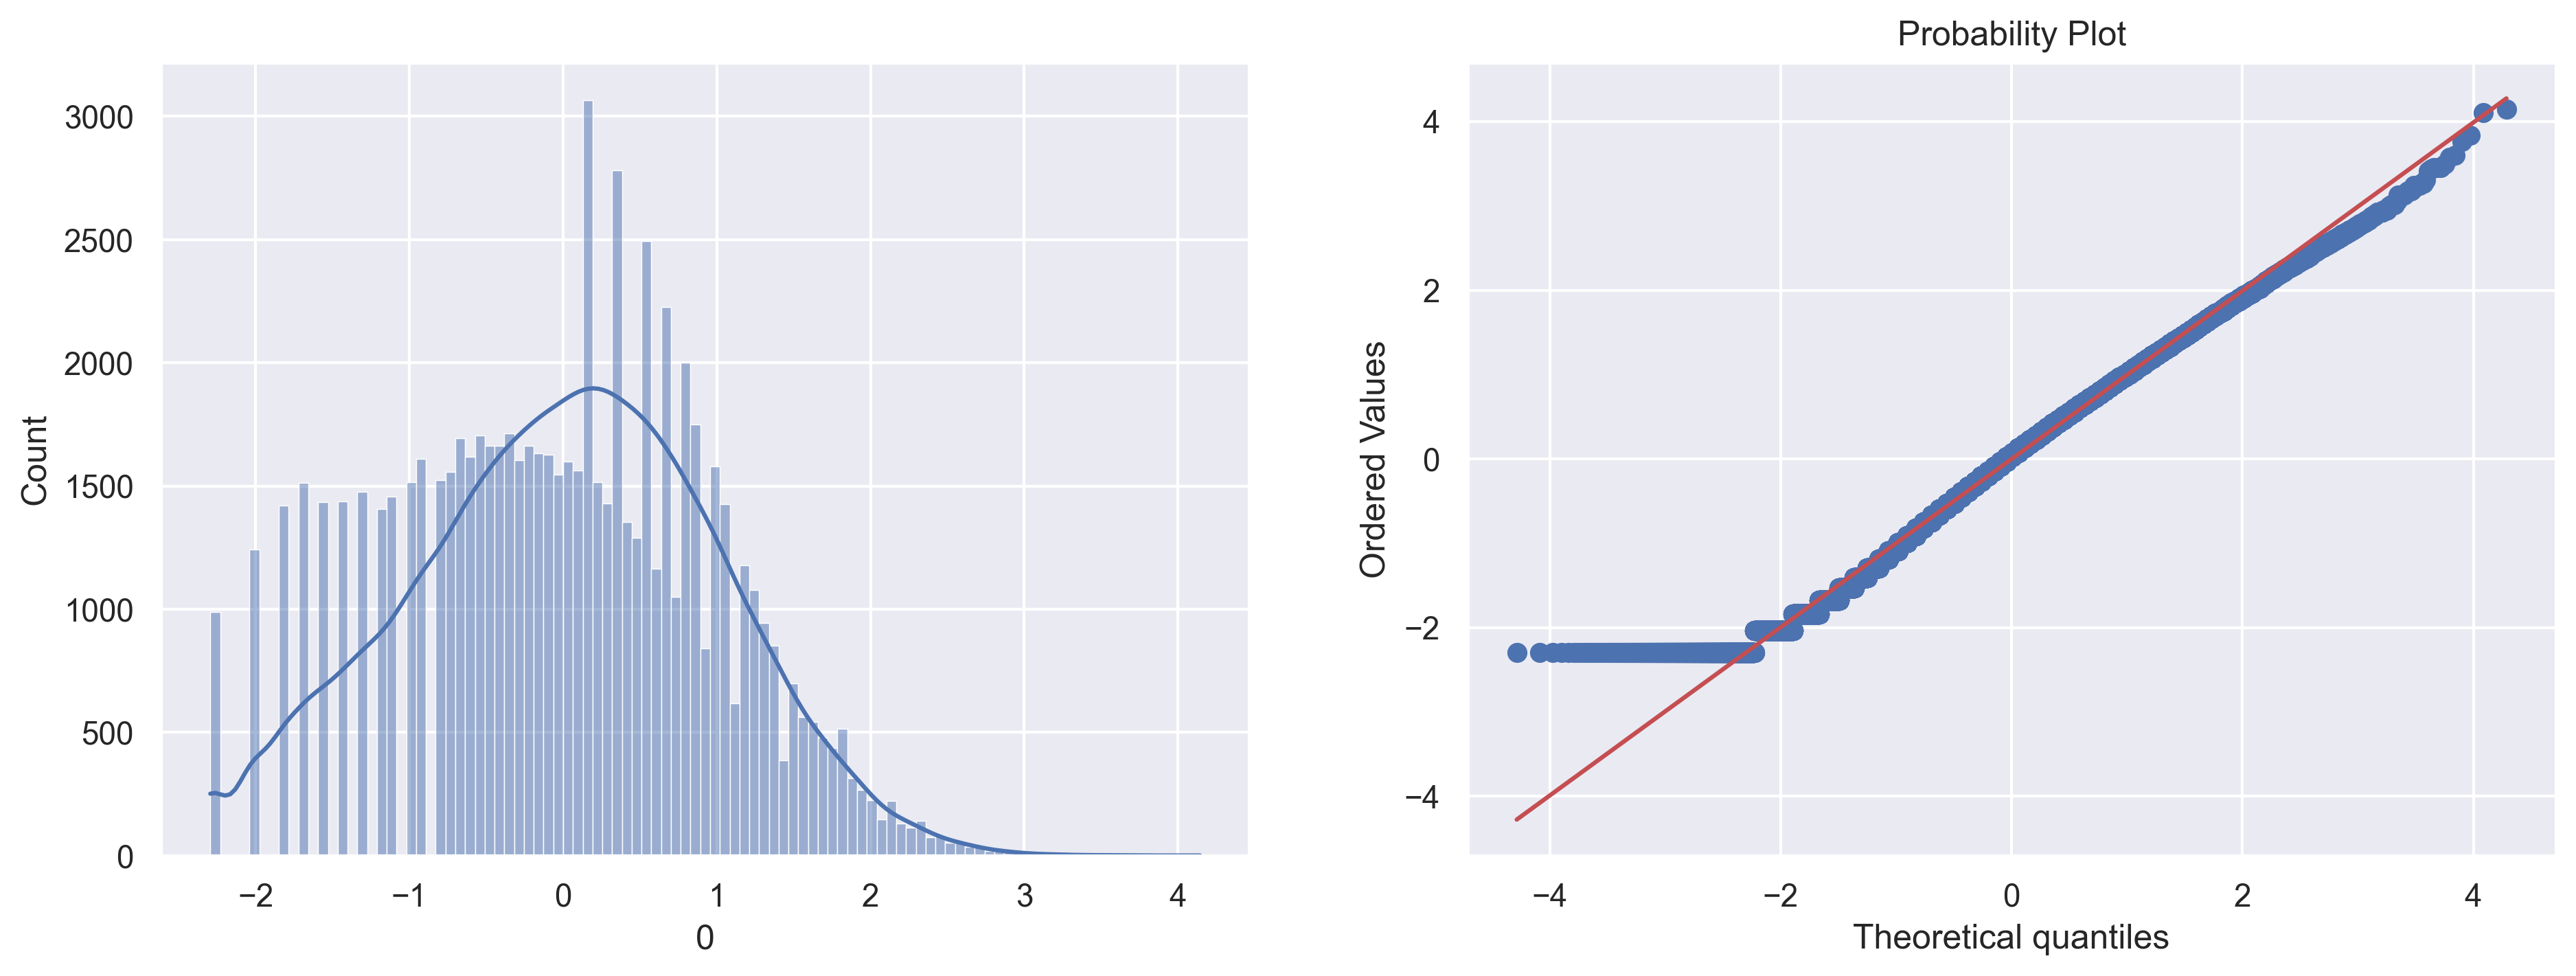

In [18]:
df_trans = pd.DataFrame(power_transform(df[['carries']], method='yeo-johnson'))
Gaussian_distribution_check(df_trans, 0)

These transformations seem to be reasobable so we will aply them and add MinMaxScaler

In [19]:
min_max_scaler = MinMaxScaler()

df[skewed_var] = power_transform(df[skewed_var], method='yeo-johnson')
df[skewed_var] = min_max_scaler.fit_transform(df[skewed_var])

### 3rd group

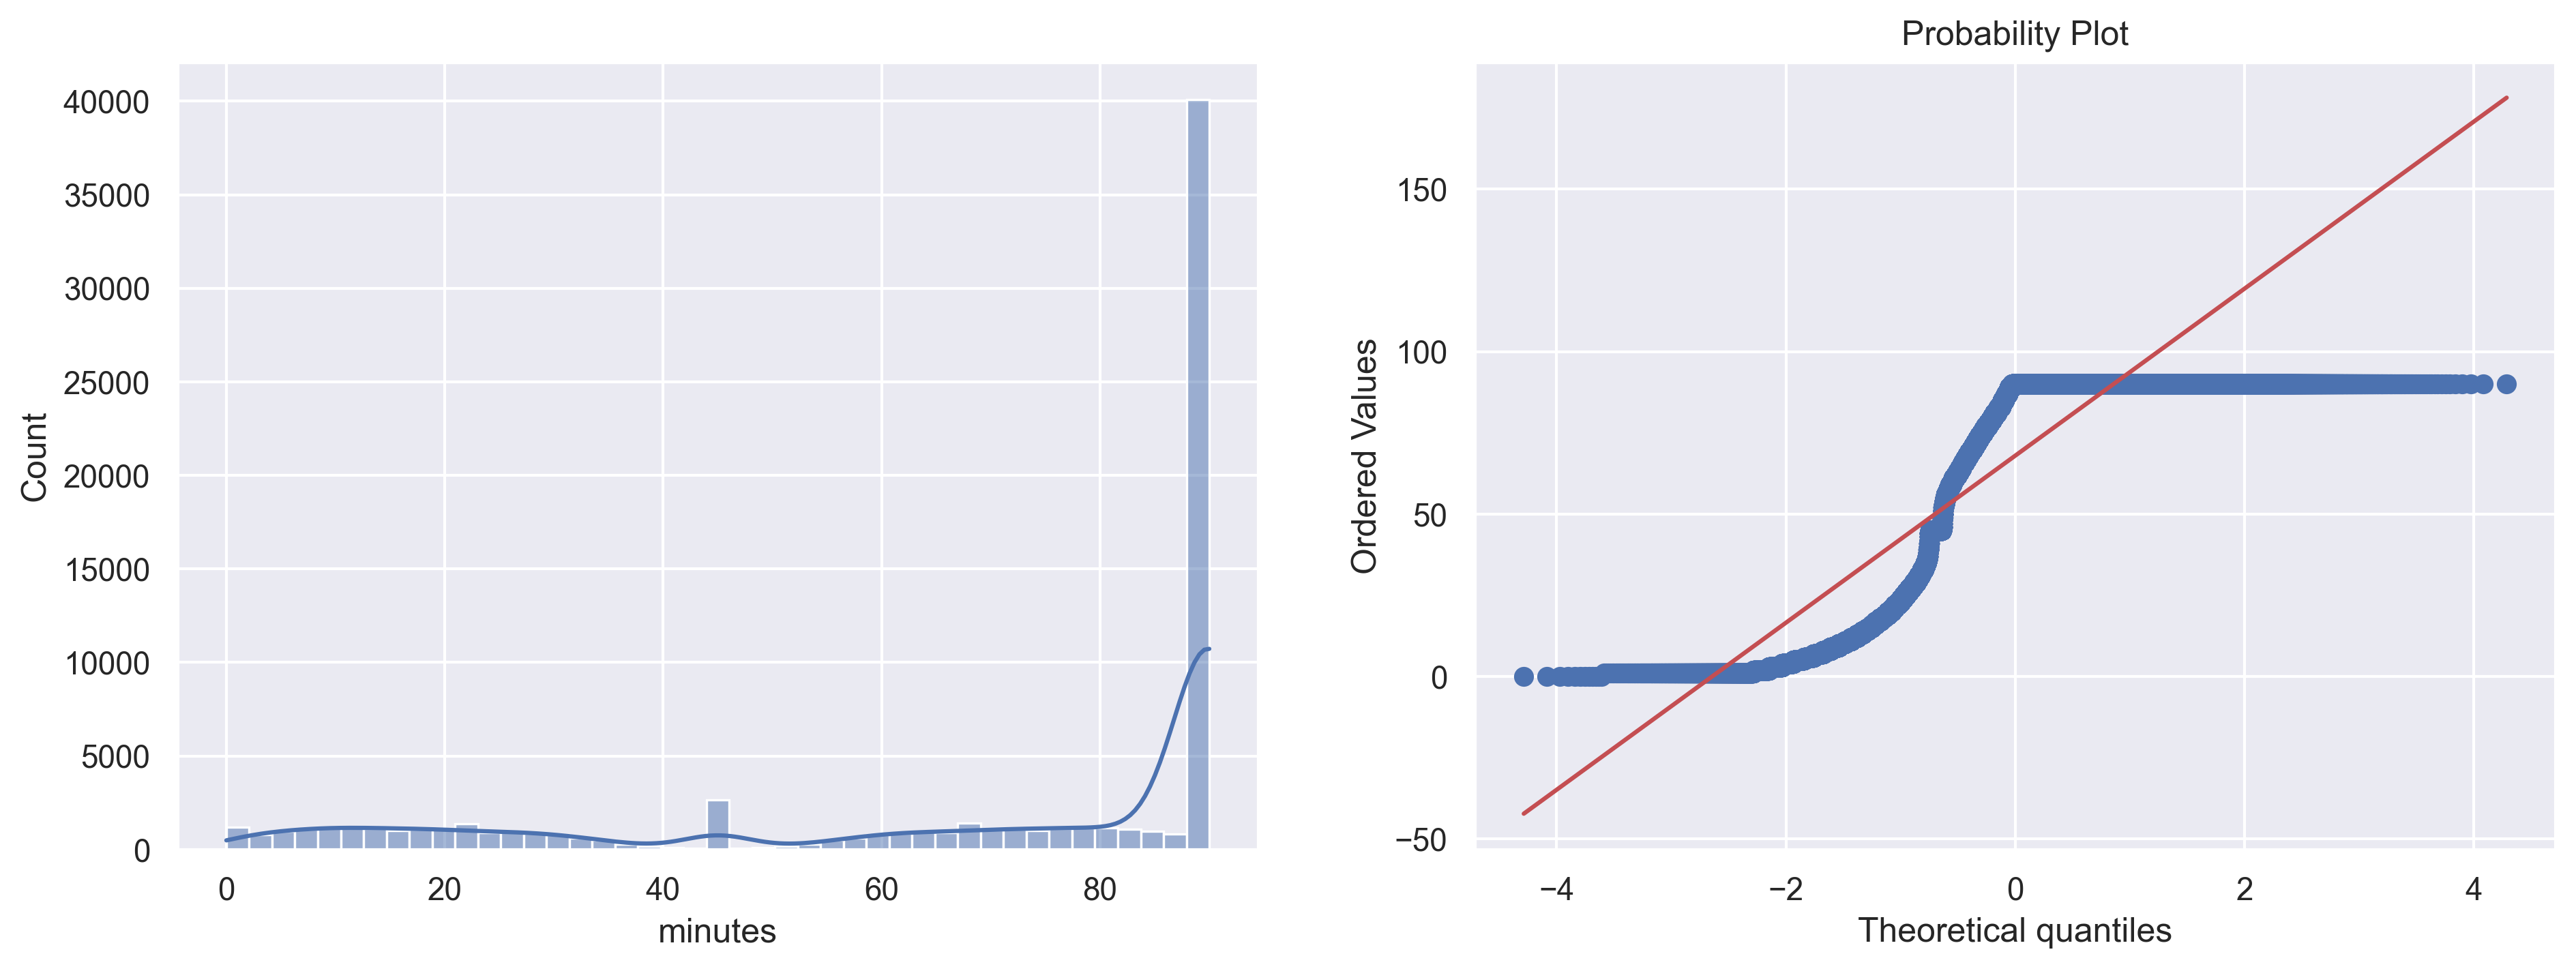

In [20]:
Gaussian_distribution_check(df, 'minutes')

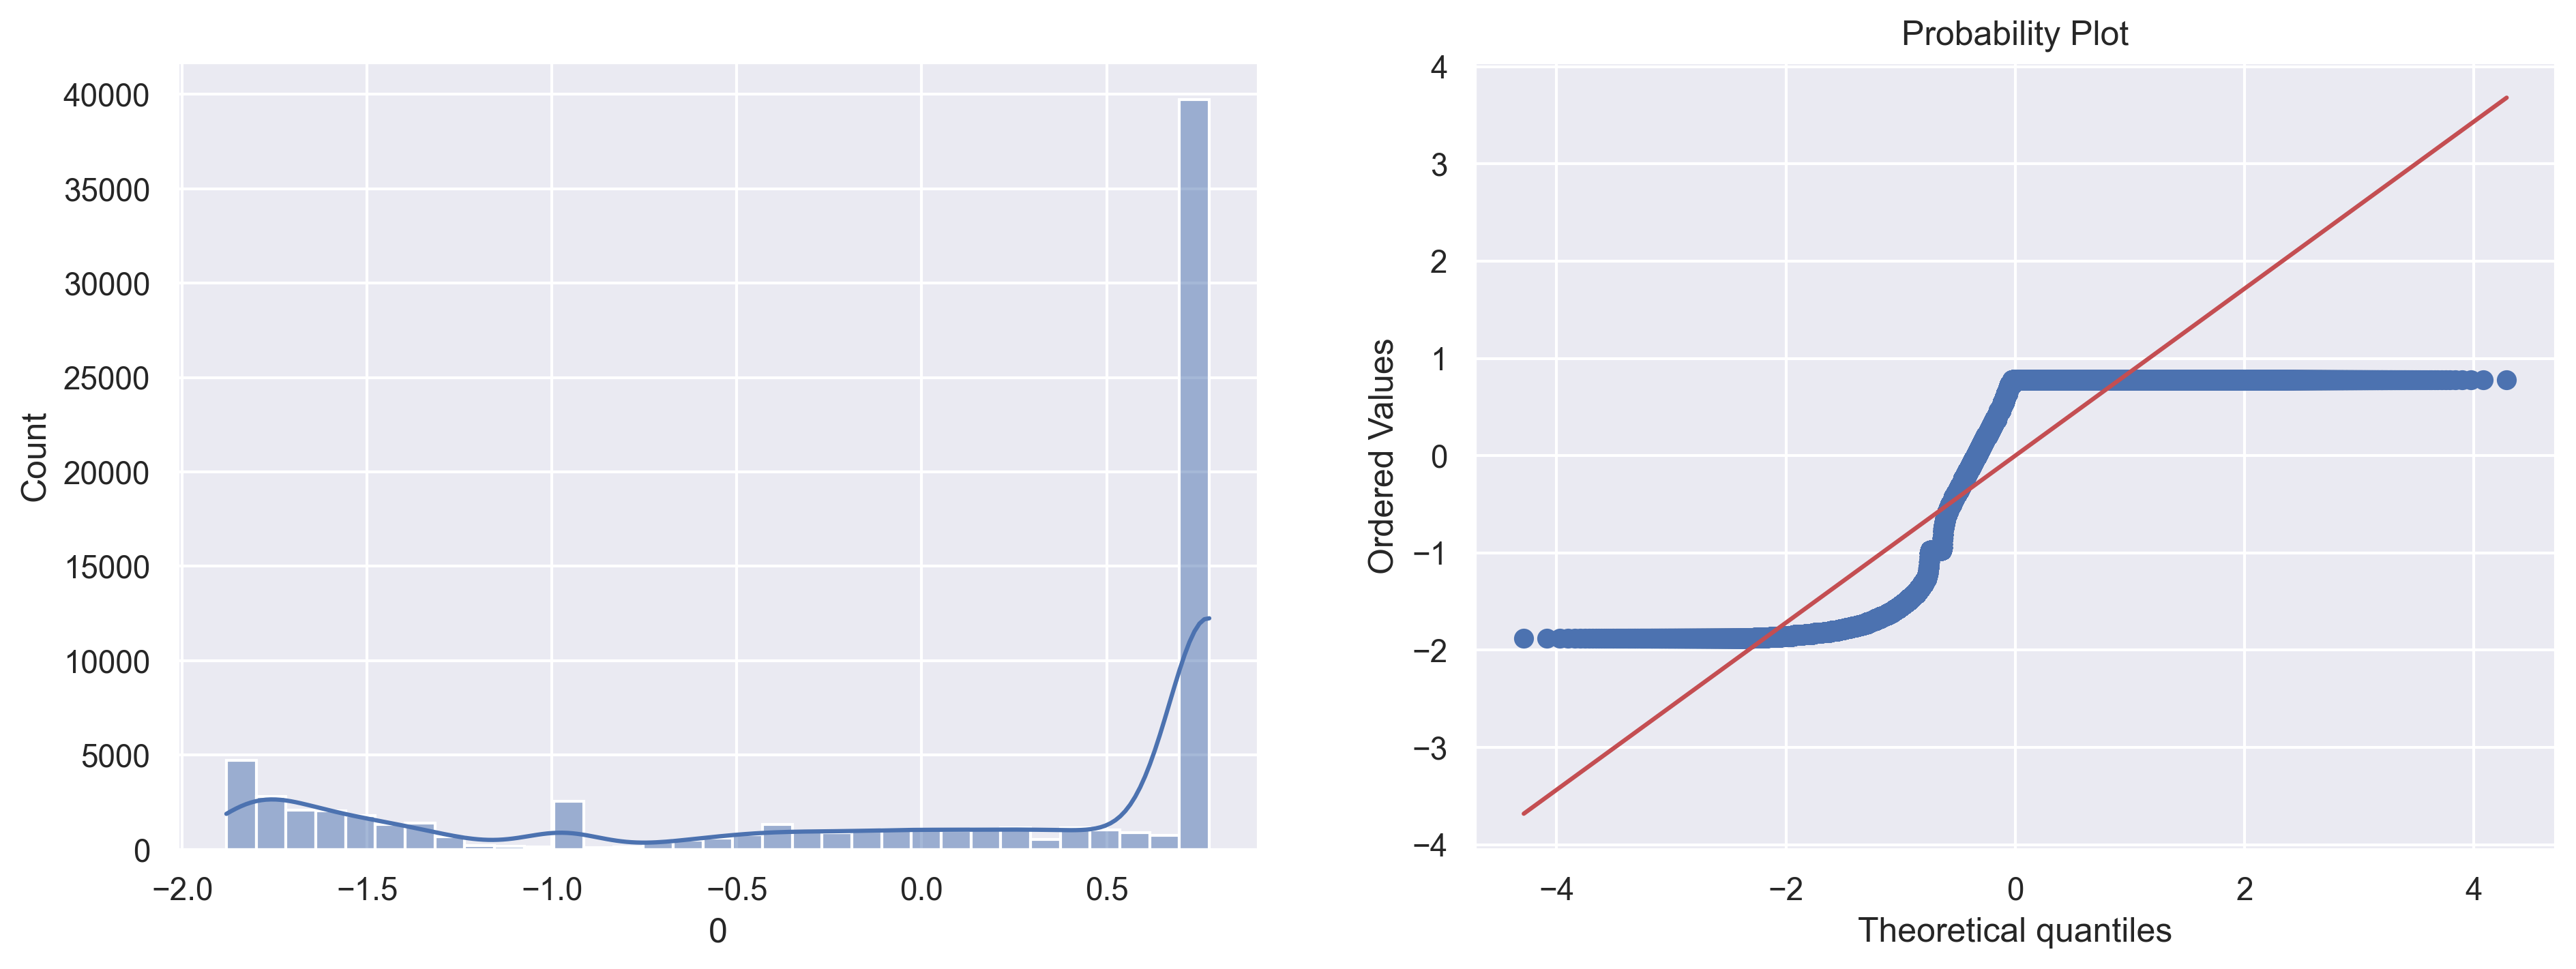

In [21]:
df_trans = pd.DataFrame(power_transform(df[['minutes']], method='yeo-johnson'))
Gaussian_distribution_check(df_trans, 0)

c:\Users\Micha\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
c:\Users\Micha\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
c:\Users\Micha\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


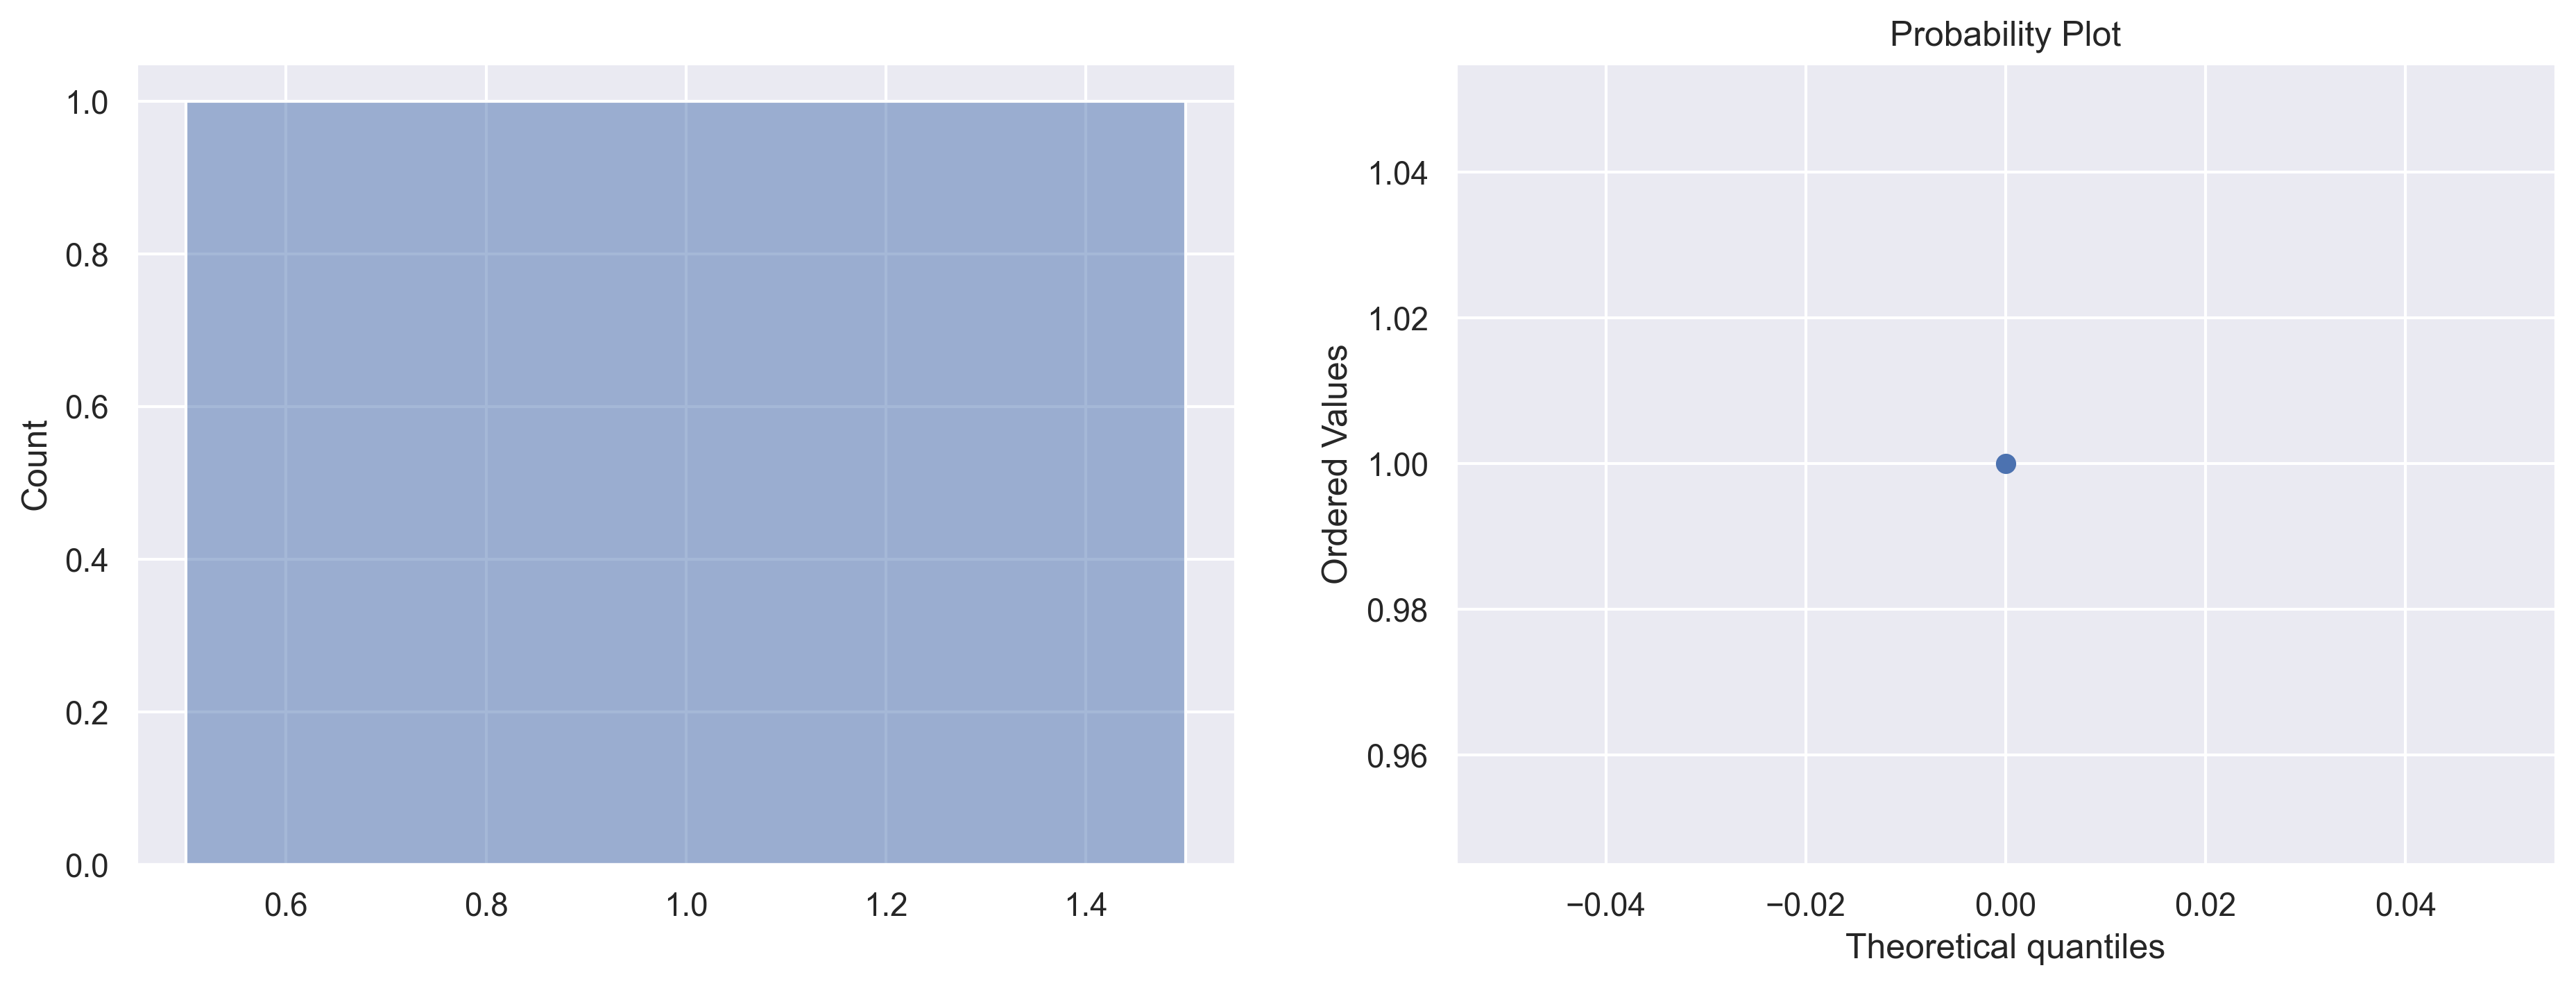

In [22]:
scaler = MinMaxScaler()

df_trans = scaler.fit_transform(df[['minutes']])
Gaussian_distribution_check(df_trans, 0)

here transformations don't seam to make a difference so we will only apply MinMax scaling

In [23]:
min_max_scaler = MinMaxScaler()

df[other] = scaler.fit_transform(df[other])

In [24]:
df.describe()

goals       assists   shots_total  shots_on_target  \
count  76142.000000  76142.000000  76142.000000     76142.000000   
mean       0.025787      0.018006      0.070092         0.038024   
std        0.085289      0.069739      0.098372         0.079517   
min        0.000000      0.000000      0.000000         0.000000   
25%        0.000000      0.000000      0.000000         0.000000   
50%        0.000000      0.000000      0.000000         0.000000   
75%        0.000000      0.000000      0.076923         0.000000   
max        1.000000      1.000000      1.000000         1.000000   

                 xg            xa           gca       carries  dispossessed  \
count  76142.000000  76142.000000  76142.000000  76142.000000  76142.000000   
mean       0.036781      0.029727      0.028055      0.356346      0.060033   
std        0.081186      0.067663      0.076481      0.155347      0.088176   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.252554      0.000000   
50%        0.000000      0.000000      0.000000      0.359907      0.000000   
75%        0.037037      0.045455      0.000000      0.463117      0.076923   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       dribbled_past  ...        passes  passes_progressive_distance  \
count   76142.000000  ...  76142.000000                 76142.000000   
mean        0.060188  ...      0.351834                     0.369899   
std         0.086936  ...      0.156729                     0.184751   
min         0.000000  ...      0.000000                     0.000000   
25%         0.000000  ...      0.241216                     0.231930   
50%         0.000000  ...      0.364121                     0.380978   
75%         0.083333  ...      0.463982                     0.512601   
max         1.000000  ...      1.000000                     1.000000   

       passes_into_final_third  passes_offsides  passes_switches  \
count             76142.000000     76142.000000     76142.000000   
mean                  0.056014         0.022910         0.070301   
std                   0.069720         0.070745         0.099271   
min                   0.000000         0.000000         0.000000   
25%                   0.000000         0.000000         0.000000   
50%                   0.027027         0.000000         0.066667   
75%                   0.081081         0.000000         0.133333   
max                   1.000000         1.000000         1.000000   

           dribbles        fouled         fouls      offsides       minutes  
count  76142.000000  76142.000000  76142.000000  76142.000000  76142.000000  
mean       0.062347      0.084104      0.106526      0.021979      0.755165  
std        0.089061      0.108297      0.127253      0.071090      0.333735  
min        0.000000      0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000      0.500000  
50%        0.052632      0.090909      0.111111      0.000000      1.000000  
75%        0.105263      0.090909      0.222222      0.000000      1.000000  
max        1.000000      1.000000      1.000000      1.000000      1.000000  

[8 rows x 35 columns]

## KMEANS

### Finding number of clusters with elbow method and silhouette score

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

In [14]:
def count_wcss_scores(X, k_max):
    #  WCSS = within-cluster sum of squares
    scores = []
    for k in range(1, k_max+1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        wcss = kmeans.score(X) * -1 # score returns -WCSS
        scores.append(wcss)
    return scores

In [15]:
def count_clustering_scores(X, cluster_num, model, score_fun):
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = []    
    for k in cluster_num_iter:
        model_instance = model(n_clusters=k)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores

In [16]:
def metrics_plots(df, max_k):

    score = []
    score_kmeans_s = []
    score_kmeans_c = []
    score_kmeans_d = []

    for k in range(2, max_k):
        kmeans = KMeans(n_clusters=k, random_state= 101)
        predictions = kmeans.fit_predict(df)
        # Calculate cluster validation metrics and append to lists of metrics
        score.append(-1 * kmeans.score(df))
        score_kmeans_s.append(silhouette_score(df, kmeans.labels_))
        score_kmeans_c.append(calinski_harabasz_score(df, kmeans.labels_))
        score_kmeans_d.append(davies_bouldin_score(df, predictions))

    list_scores = [score, score_kmeans_s, score_kmeans_c, score_kmeans_d] 
    # Elbow Method plot
    list_title = ['Within-cluster sum of squares', 'Silhouette Score', 'Calinski Harabasz', 'Davies Bouldin'] 
    for i in range(len(list_scores)):
        x_ticks = list(range(2, len(list_scores[i]) + 2))
        plt.plot(x_ticks, list_scores[i], 'bx-')
        plt.xlabel('k')
        plt.ylabel(list_title[i])
        plt.title('Optimal k')
        plt.show()

In [17]:
scaled_df = pd.read_csv("..\\..\\data\\after_fe_data.csv")

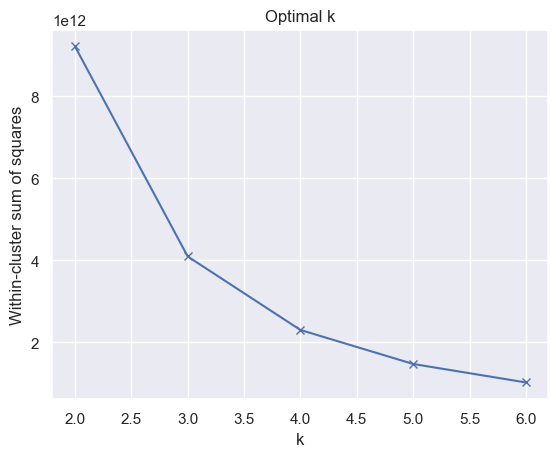

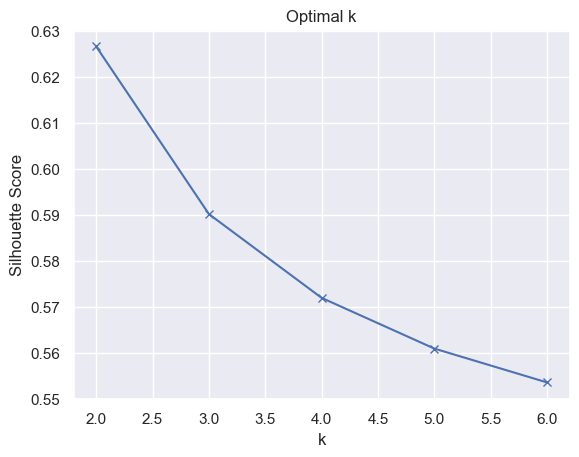

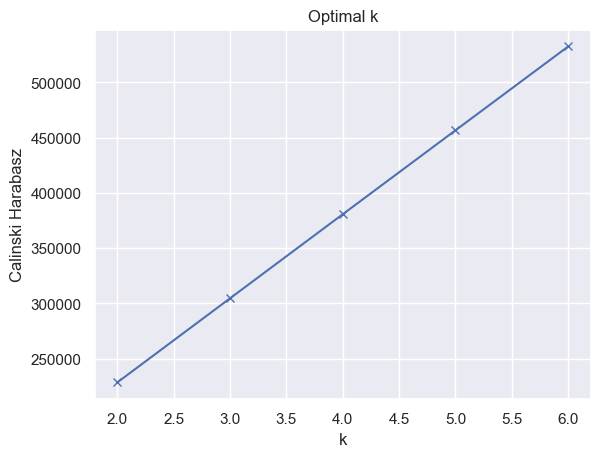

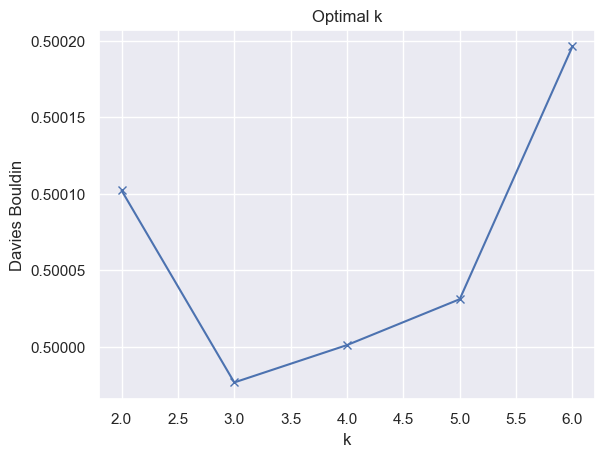

In [18]:
metrics_plots(scaled_df, 7)

3 and 6 seams reasonable

### Kmeans for 3 clusters

In [38]:
kmeans = KMeans(3)
kmeans.fit(scaled_df)

KMeans(n_clusters=3)

In [39]:
labels = pd.DataFrame(kmeans.labels_)

In [40]:
labeledData = pd.concat((scaled_df,labels),axis=1)
labeledData = labeledData.rename({0:'labels'},axis=1)

In [41]:
labeledData['Constant'] = "Data"

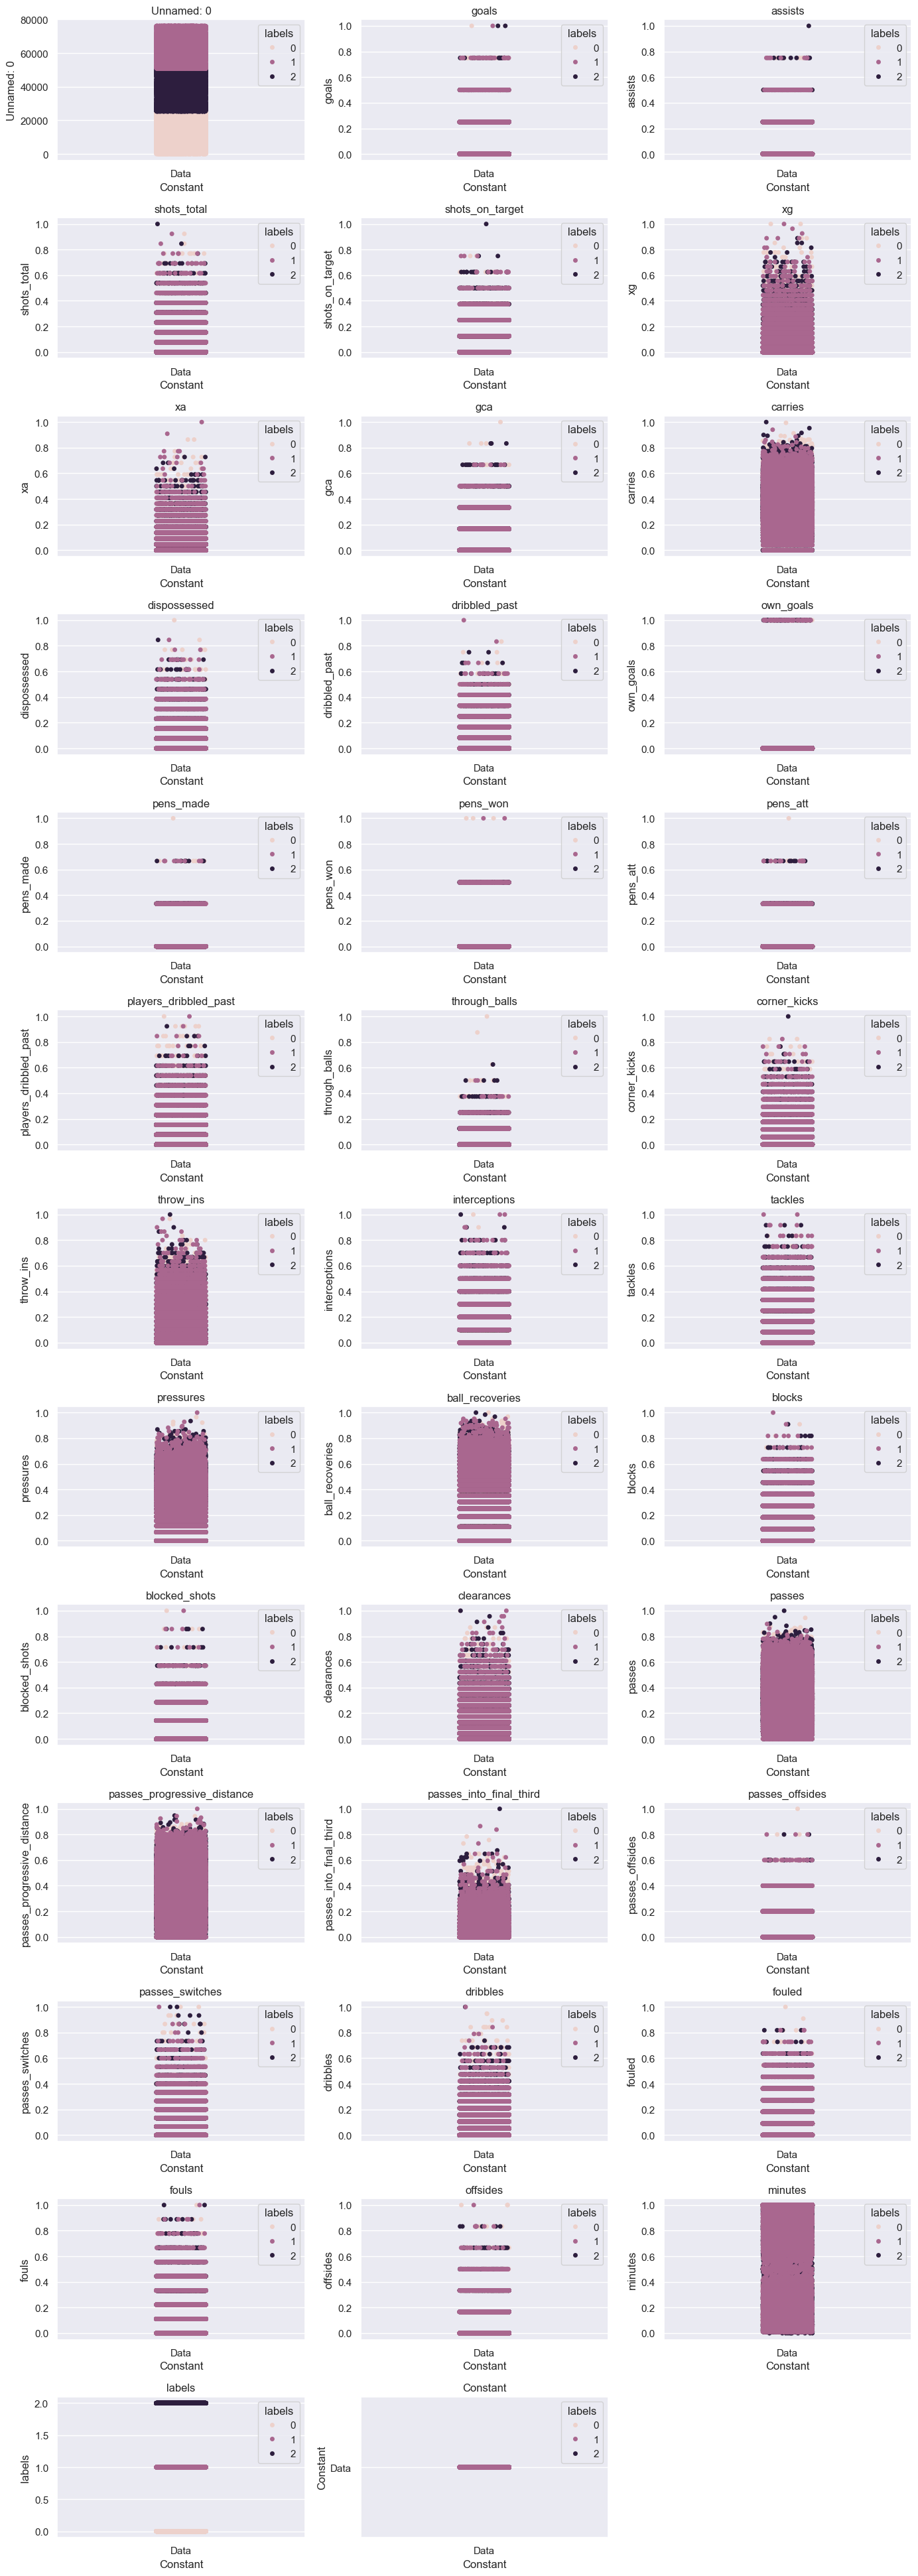

In [42]:
nr_cols = 3
nr_rows = int(np.ceil(len(labeledData.columns) / nr_cols))

plt.figure(figsize=(14, nr_rows * 3))

for i, col in enumerate(labeledData.columns):
    plt.subplot(nr_rows, nr_cols, i+1)
    sns.stripplot(x=labeledData['Constant'],y=labeledData[col],hue=labeledData['labels'],jitter=True)
    plt.title(col)
    plt.tight_layout()

### Kmeans for 6 clusters

In [ ]:
kmeans = KMeans(6)
kmeans.fit(scaled_df)

labels = pd.DataFrame(kmeans.labels_) 

labeledData = pd.concat((scaled_df,labels),axis=1)
labeledData = labeledData.rename({0:'labels'},axis=1)

labeledData['Constant'] = "Data"

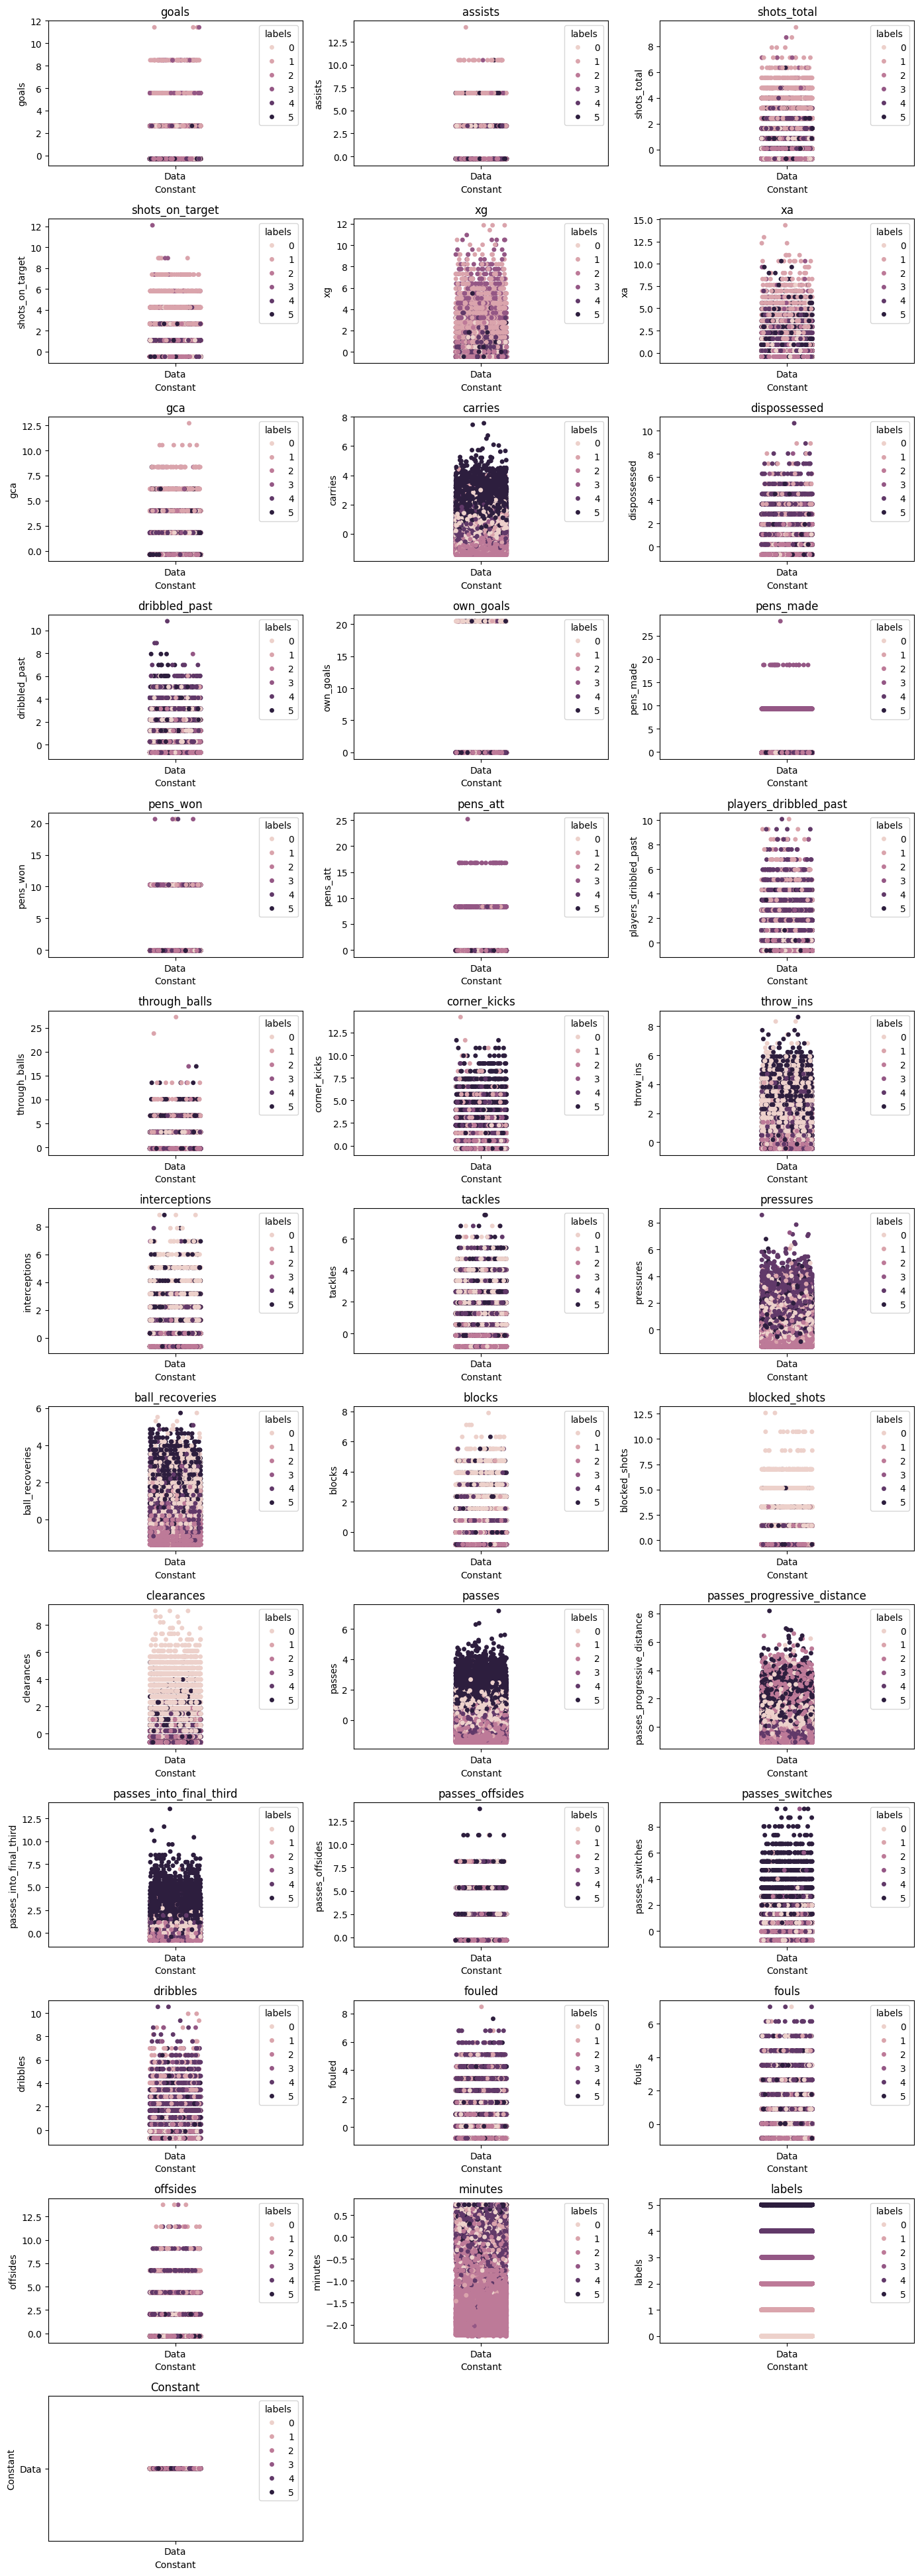

In [ ]:
nr_cols = 3
nr_rows = int(np.ceil(len(labeledData.columns) / nr_cols))

plt.figure(figsize=(14, nr_rows * 3))

for i, col in enumerate(labeledData.columns):
    plt.subplot(nr_rows, nr_cols, i+1)
    sns.stripplot(x=labeledData['Constant'],y=labeledData[col],hue=labeledData['labels'],jitter=True)
    plt.title(col)
    plt.tight_layout()